### Case Study 4 :  Data Science Shark Tank

***Due Date: December 8, before 6pm***

Note: 
    
***part_1 and part_3 of Problem_1, and links to datasets (or API you are planning to use) should be sent to me by email (tghoshal@wpi.edu) before 5:59pm on Nov 18. You must CC all your group members in that email. Without this step, your project may not be approved for presentation on Dec 9.***

also NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!
 
 ![Bilby Stampede](https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg)

### Introduction

After the previous 3 case studies,  your are now equipped with three powerful skills of an effective data scientist: ***data gathering, model development, exploratory data analysis***. In this case study, your team is going to act like a data science team in a mid-size company. Your team will make use of these skills to come up with an idea for a new data science project, covince senior executives of the idea to get funding/ financial resources using data driven presentations, and finally build a prototype model for use by another team within the company. 

Your team needs to decide which business problem is important for the market your company is in (for example, social media market, housing market, search market, etc.). Then use data science approaches to gather data, explore the data, tie with business needs, make conjectures, develop models etc.

The solution should include some key components of data science: 

    1) the business part to analyze the potential impact of your new/improved service, why the idea can make money, how are you planning to persuade senior executives (e.g. seniors VPS/ CEO/ COO) to allocate money for your project
    
    2) collect data, perform exploratory data analysis, make conjectures in support of the business plan made in the previous step
    
    3) Use one of your conjectures from step 2 as the motivation for developing a model. Use appropriate features from your data and build the model.

NOTE, as opposed to the first three case studies, case study 4 is much much more open ended. A more complex model does not mean a better project. Also, strong exploratory data analysis loosely tied with the business question also does not mean a better project. Try to make all parts coherent so that they collectively tell one story.

# Background (Elevator Pitch)

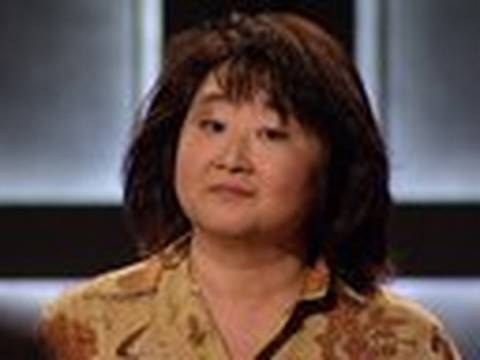

In [ ]:
# Should your project be like this?

from IPython.display import YouTubeVideo
YouTubeVideo("3UuFR4Y4uw8") 

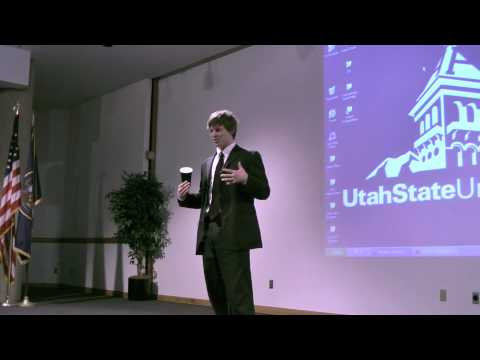

In [ ]:
# Or should your project be like this?

YouTubeVideo("i6O98o2FRHw") 

## Some Resources

### Two videos on storytelling

https://video.wpi.edu/Watch/g2T4NjBn

https://video.wpi.edu/Watch/q2A6Dbg3


**Optional Readings:** 


** APIs **
* Zillow API: https://pypi.python.org/pypi/pyzillow
* Google Map API: https://developers.google.com/api-client-library/python/apis/mapsengine/v1?hl=en
* More APIs: https://github.com/ptwobrussell/Mining-the-Social-Web-2nd-Edition

** Python libraries you may want to use:**
* Scikit-learn (http://scikit-learn.org): machine learning tools in Python.

** Data sources:**
* UCI Machine Learning Repository: http://archive.ics.uci.edu/ml/ 
* Statlib datasets: http://lib.stat.cmu.edu/datasets/
* Kaggel: www.kaggle.com 
* Open Gov. Data: www.data.gov, www.data.gov.uk, www.data.gov.fr, http://opengovernmentdata.org/data/catalogues/   




### Problem 1: the Business Part (20 points)
 As a group, learn about the data science related business and research about the current markets: such as search, social media, advertisement, recommendation and so on. Pick one of the markets for further consideration, and propose a new data science project which you believe will be important for your company to do well in the market. Define precisely in the report and briefly in the cells below, what is the business problem that your team wants to solve.
Why the problem is important to solve? 
Why you believe your team can make use of data science methodologies to solve the problem?
How are you planing to persuade the senior executives to buy in your idea.

**Please describe here *briefly*  (please edit this cell)**

1) Your business problem to solve:
We plan to analyze cryptocurrency data to create a predictive model to assist in making informed investment decisions. We also plan to compare these markets to the current standard stock market using the S&P 500 as a baseline comparison. 


2) Why the problem is important to solve? 
With the rise in the crypto market, it has been observed to be very volatile. A trusted model to predict the future trends could help investors make safer and more informed decisions on where they choose to invest their money.

3) What is your idea to solve the problem? 
We plan to use historical market data for a range of crypto coins to create a stochastic predictive model that will estimate the future for these coins. We will baseline this with a pre-existing model of the S&P 500 to determine if crypto can make money or if it safer to invest in index funds.

4) What differences you could make with your data science approach?
Currently, the crypto market is a new and unexplored area as most people still don't quite grasp what it is. Using data science approaches, we can take historical market data and create a platform (similar to Robinhood and other investing sites) that can make smart investment strategies more accessible and understandable to everyone.

5) Why do you believe the idea deserves the financial resources of your company?
Market trading over the past two years has exploded with the access to stock trading with the push of a button on our phones. These platforms, while accessible, do not often predict growth but rather show previous growth. In the crypto market, the increased volatility makes these investments even more risky, and seemingly unpredictable. We believe that we can use the market data to create a platform that provides informed stock trading decisions that can take advantage of the high reward aspect of crypto while eliminating the blind trading that has been associated with it. 





## Importing packages & libraries:

In [ ]:
#Run if model does not have access to prophet
#!pip install pystan==2.19.1.1 convertdate prophet
#!pip install tensorflow
#!pip install fbprophet
#!pip install prophet

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import seaborn as sns
import matplotlib.dates as mdates
from prophet import Prophet
import plotly.offline as py
import plotly.graph_objs as go

plt.style.use(['seaborn'])
matplotlib.rc("font", family="Times New Roman", size=12)


%matplotlib inline

# Please see the Case study 4 outline in the Google drive

### Problem 2: Data Gathering, Exploratory Data Analysis, Make Conjectures (20 points)

Gather data in support of your responses for Problem 1. Use appropriate data analysis techniques to explore the data. Make conejectures in relation to problem 1. Find support for your conjectures using the data.

**Insert your answers in the cell below** 

**Add as many cells as needed**


If you are using an API to collect data, provide the code below.

If you collecting data from publicly available datasets, provide the links to them below.

### (1)Importing Kaggle Datasets 

run this cell only one time to import crypt dataset to our project. comment the cell after the data has been imported.

In [ ]:
# Importing Kaggle Datasets into Deepnote:
# !kaggle datasets download -d sudalairajkumar/cryptocurrencypricehistory --unzip

### (2)  Merge the CSV files into a single Pandas dataframe

1- Load the datasets.

In [16]:

# dataset folder:
dataDir = "./crypt_data"
# merging csv files:
joined_csv_files = os.path.join(dataDir, 'coin_*.csv' )

# the retuned list of all joined files 
joined_list = glob.glob(joined_csv_files)

#The dataframe that has all merged files
crypt_df = pd.concat(map(pd.read_csv, joined_list), ignore_index= True)
crypt_df = crypt_df.drop('SNo', axis=1)
crypt_df["Date"] = pd.to_datetime(crypt_df['Date'])
crypt_df["Date"] = crypt_df["Date"].dt.strftime("%Y-%m-%d %H:%M:%S")
crypt_df.tail(5)


Name Symbol  ...        Volume     Marketcap
35611  Stellar    XLM  ...  3.487793e+08  6.118631e+09
35612  Stellar    XLM  ...  3.310069e+08  6.139464e+09
35613  Stellar    XLM  ...  3.376196e+08  6.227819e+09
35614  Stellar    XLM  ...  3.359242e+08  5.910264e+09
35615  Stellar    XLM  ...  3.604261e+08  6.049985e+09

[5 rows x 9 columns]

2- Preprocessing

In [17]:
# check if the Date colum has been set as index, to avoid having error
if 'Date' in crypt_df:
    # set Date column as an index for the crypt df:
    crypt_df.set_index(pd.DatetimeIndex(crypt_df['Date']), inplace = True, drop=False)
    # Convert string Date time into Python Date time object:
    crypt_df.sort_index(inplace=True)
else:
    print(' The Date has been set as index')

In [18]:
# Treat missing values:
# Count unique elements in each column including NaN:
uniqueValues = crypt_df.nunique(dropna=False)
print(uniqueValues)

print('----------')
print( " Are there any missing values in the dataset? ")
print(crypt_df.isnull().values.any())

Name            22
Symbol          22
Date          2991
High         34821
Low          34870
Open         34824
Close        34819
Volume       34931
Marketcap    34656
dtype: int64
----------
 Are there any missing values in the dataset? 
False


In [19]:
doge = crypt_df['Name'].isin(['Dogecoin'])
coin = crypt_df[doge]
coin

Name Symbol  ...        Volume     Marketcap
Date                                  ...                            
2013-12-16 23:59:59  Dogecoin   DOGE  ...  0.000000e+00  1.509085e+06
2013-12-17 23:59:59  Dogecoin   DOGE  ...  0.000000e+00  2.169688e+06
2013-12-18 23:59:59  Dogecoin   DOGE  ...  0.000000e+00  3.188943e+06
2013-12-19 23:59:59  Dogecoin   DOGE  ...  0.000000e+00  1.115034e+07
2013-12-20 23:59:59  Dogecoin   DOGE  ...  0.000000e+00  7.284337e+06
...                       ...    ...  ...           ...           ...
2021-07-02 23:59:59  Dogecoin   DOGE  ...  1.321471e+09  3.194925e+10
2021-07-03 23:59:59  Dogecoin   DOGE  ...  9.170158e+08  3.210491e+10
2021-07-04 23:59:59  Dogecoin   DOGE  ...  9.735115e+08  3.211767e+10
2021-07-05 23:59:59  Dogecoin   DOGE  ...  1.267949e+09  3.018344e+10
2021-07-06 23:59:59  Dogecoin   DOGE  ...  1.265920e+09  3.055252e+10

[2760 rows x 9 columns]

In [20]:
##Show Statistical description of non-categorical variables:
crypt_df.describe()

High           Low  ...        Volume     Marketcap
count  35616.000000  35616.000000  ...  3.561600e+04  3.561600e+04
mean    1057.681061    992.033433  ...  3.069224e+09  1.590229e+10
std     5352.362995   5004.072814  ...  1.214467e+10  7.198830e+10
min        0.000089      0.000079  ...  0.000000e+00  0.000000e+00
25%        0.067432      0.062454  ...  4.082010e+06  2.202374e+08
50%        1.003110      0.997574  ...  7.346799e+07  1.274617e+09
75%       40.240552     35.338074  ...  7.516504e+08  5.198347e+09
max    64863.098908  62208.964366  ...  3.509679e+11  1.186364e+12

[8 rows x 6 columns]

In [21]:
crypt_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35616 entries, 2013-04-29 23:59:59 to 2021-07-06 23:59:59
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       35616 non-null  object 
 1   Symbol     35616 non-null  object 
 2   Date       35616 non-null  object 
 3   High       35616 non-null  float64
 4   Low        35616 non-null  float64
 5   Open       35616 non-null  float64
 6   Close      35616 non-null  float64
 7   Volume     35616 non-null  float64
 8   Marketcap  35616 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.7+ MB


### (3) Basic statistics:

######  Extract closing prices (The target)

In [22]:
close_price_df= crypt_df.pivot_table(values ='Close', index= crypt_df.index, columns = 'Name')
close_price_df.describe()

Name         Aave  Binance Coin  ...  Wrapped Bitcoin          XRP
count  275.000000   1442.000000  ...       888.000000  2893.000000
mean   255.525845     52.250308  ...     17086.573875     0.234790
std    161.649917    115.390917  ...     15798.492134     0.338629
min     27.715084      0.099867  ...      3395.978616     0.002810
25%     81.100120     10.068350  ...      8031.116676     0.007346
50%    295.089229     16.210569  ...      9801.389279     0.182608
75%    382.579255     27.691107  ...     18335.262163     0.312465
max    632.266488    675.684077  ...     63436.579780     3.377810

[8 rows x 22 columns]

#### Observations:
* The Bitcoin has the highest maximum close price following by wrapper Bitcoin at a certain point 

### (3) Exploratory Data Analysis (EDA)

#### 1-How much did crypto coins grow since 2013?

Visualize the cumulative change over time:

In [28]:
fig = go.Figure()
close_df = crypt_df[['Name','Close']]

crypt_name = crypt_df['Name'].unique()
# Scatter

for coin in crypt_name:
  coin_data = close_df['Name'].isin([coin])
  coin_data_df = close_df[coin_data]
  pct_cum_close = (coin_data_df.Close.pct_change()+1).cumprod()
  fig = fig.add_trace(
      go.Scatter(x = coin_data_df.index,
                 y = pct_cum_close, 
                 name = coin,))

  
fig.update_layout(
    title = 'The Cumulative Return in Cryptocurrency since 2013',
    xaxis_title = 'Price trend for crypto coins from 2013 to 2021',
    yaxis_title = 'Closing price (USD)', 
    legend=dict( orientation="h", yanchor="bottom", y=-0.4, xanchor="center",x=0.5))

fig.update_yaxes(type='log', tickprefix='$')
fig.show()


#### Observations:
* we can see a clear spike in all the crytocurrency in 2018.
* after 2018, prices starting falling and spike again in. 2021
* in general, the trends for each coin appears to be correlated


#### 2- Percentage change 


In [35]:
# Return percentage change in close 
pct_close_df= (close_price_df.pct_change()+1)

* Monthly change of each crypto coin for 2021

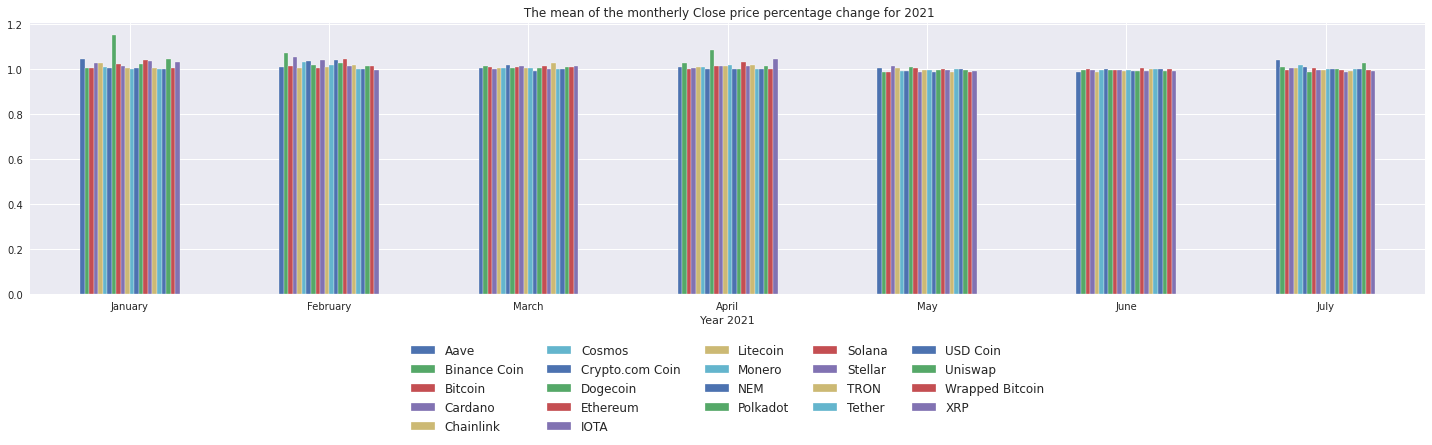

In [36]:
monthly_returns = pct_close_df.resample('M').mean()
monthly_2021_returns = monthly_returns[(monthly_returns.index.year==2021)]

monthly_2021_returns.set_index(monthly_2021_returns.index.month_name(), inplace=True)
ax = monthly_2021_returns.plot.bar(rot=0, figsize=(25,5),  title=' The mean of the montherly Close price percentage change for 2021')
ax.set_xlabel("Year 2021")
plt.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.55), fontsize=12 , fancybox=True)#, shadow=True)

* Average closing price for each crypto over the past 10 years

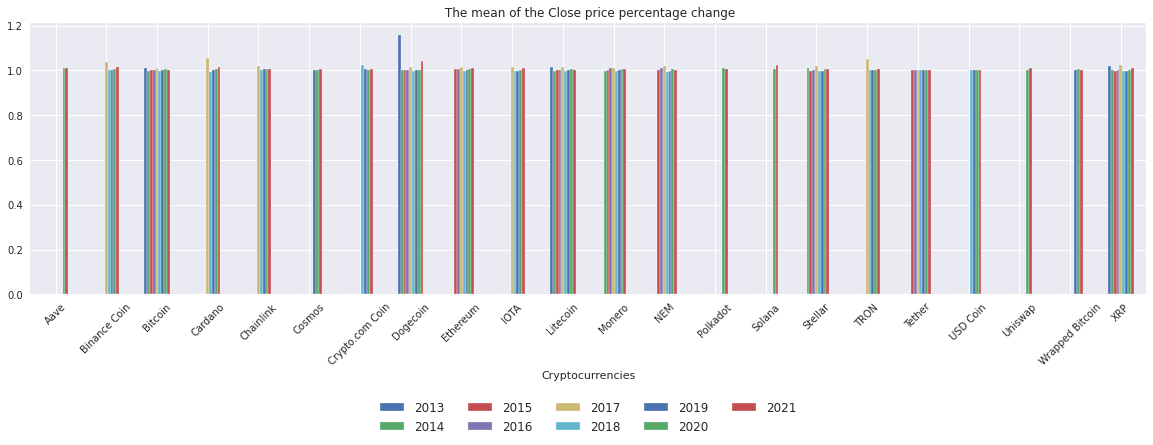

In [37]:
yearly_returns = pct_close_df.resample('Y').mean()
yearly_returns.set_index(yearly_returns.index.year, inplace=True)

# plot by coin names
ax = yearly_returns.T.plot.bar(rot=45, figsize=(20,5),  title=' The mean of the Close price percentage change')
ax.set_xlabel("Cryptocurrencies")
plt.legend(loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.55), fontsize=12 , fancybox=True)#, shadow=True)


#### 3- What are the top 5 cryptos?

We define our top crypto based on the market cap. The market cap is used to tell a more complete story and compare value across cryptocurrencies. As a key statistic, it can indicate the growth potential of a cryptocurrency and whether it is safe to buy, compared to others. Market cap (MC) is a useful metric for comparing the total value of cryptocurrencies. So it can help to make more informed investment decisions. 

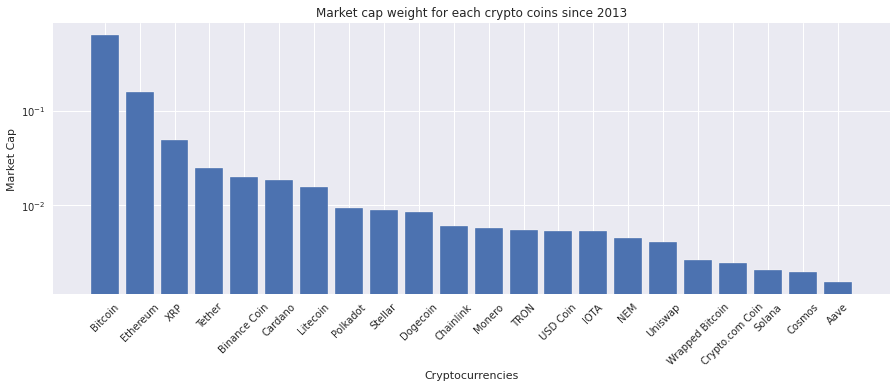

In [38]:
##Market cap weighted average
## The weights are proportional to the market caps. 

import math


market_cap_df = crypt_df[['Name','Marketcap']]

market_cap_df = market_cap_df.sort_values(by="Marketcap", ascending=False) # sort by market cap
coin_names = market_cap_df["Name"].to_list() # ["Bitcoin", "Cosmos", ...] 
crypt_name = crypt_df['Name'].unique()
total_marketcap = np.sum(market_cap_df["Marketcap"])
coin_markt_cap_df = pd.DataFrame()
for i, coin in zip(range(len(coin_names)), crypt_name):
    coin_data = market_cap_df['Name'].isin([coin])
    coin_data_df = market_cap_df[coin_data]
    agg_mc= np.sum(coin_data_df['Marketcap'])
    weight_idx_mc = agg_mc/total_marketcap
    coin_markt_cap_df.loc[i, 'Name'] = coin
    coin_markt_cap_df.loc[i, 'Marketcap_weight']= weight_idx_mc
    

coin_markt_cap_df = coin_markt_cap_df.sort_values(by='Marketcap_weight', ascending=False)

plt.figure(figsize=(15, 5))
plt.bar( coin_markt_cap_df['Name'], coin_markt_cap_df['Marketcap_weight'])#, title=' The Marketcap weight for each crypto coins since 2013')
plt.xticks(rotation=45)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Market Cap")
plt.yscale('log')
plt.title('Market cap weight for each crypto coins since 2013')
plt.show()

#### Observations:
* The 5 top coins are Bitcoin, Ethereum, Binance Coin, Dogecoin, and Tether

#### 4-Subplots for all coins showing volume over time

Text(0.5, 1.0, 'Aave')

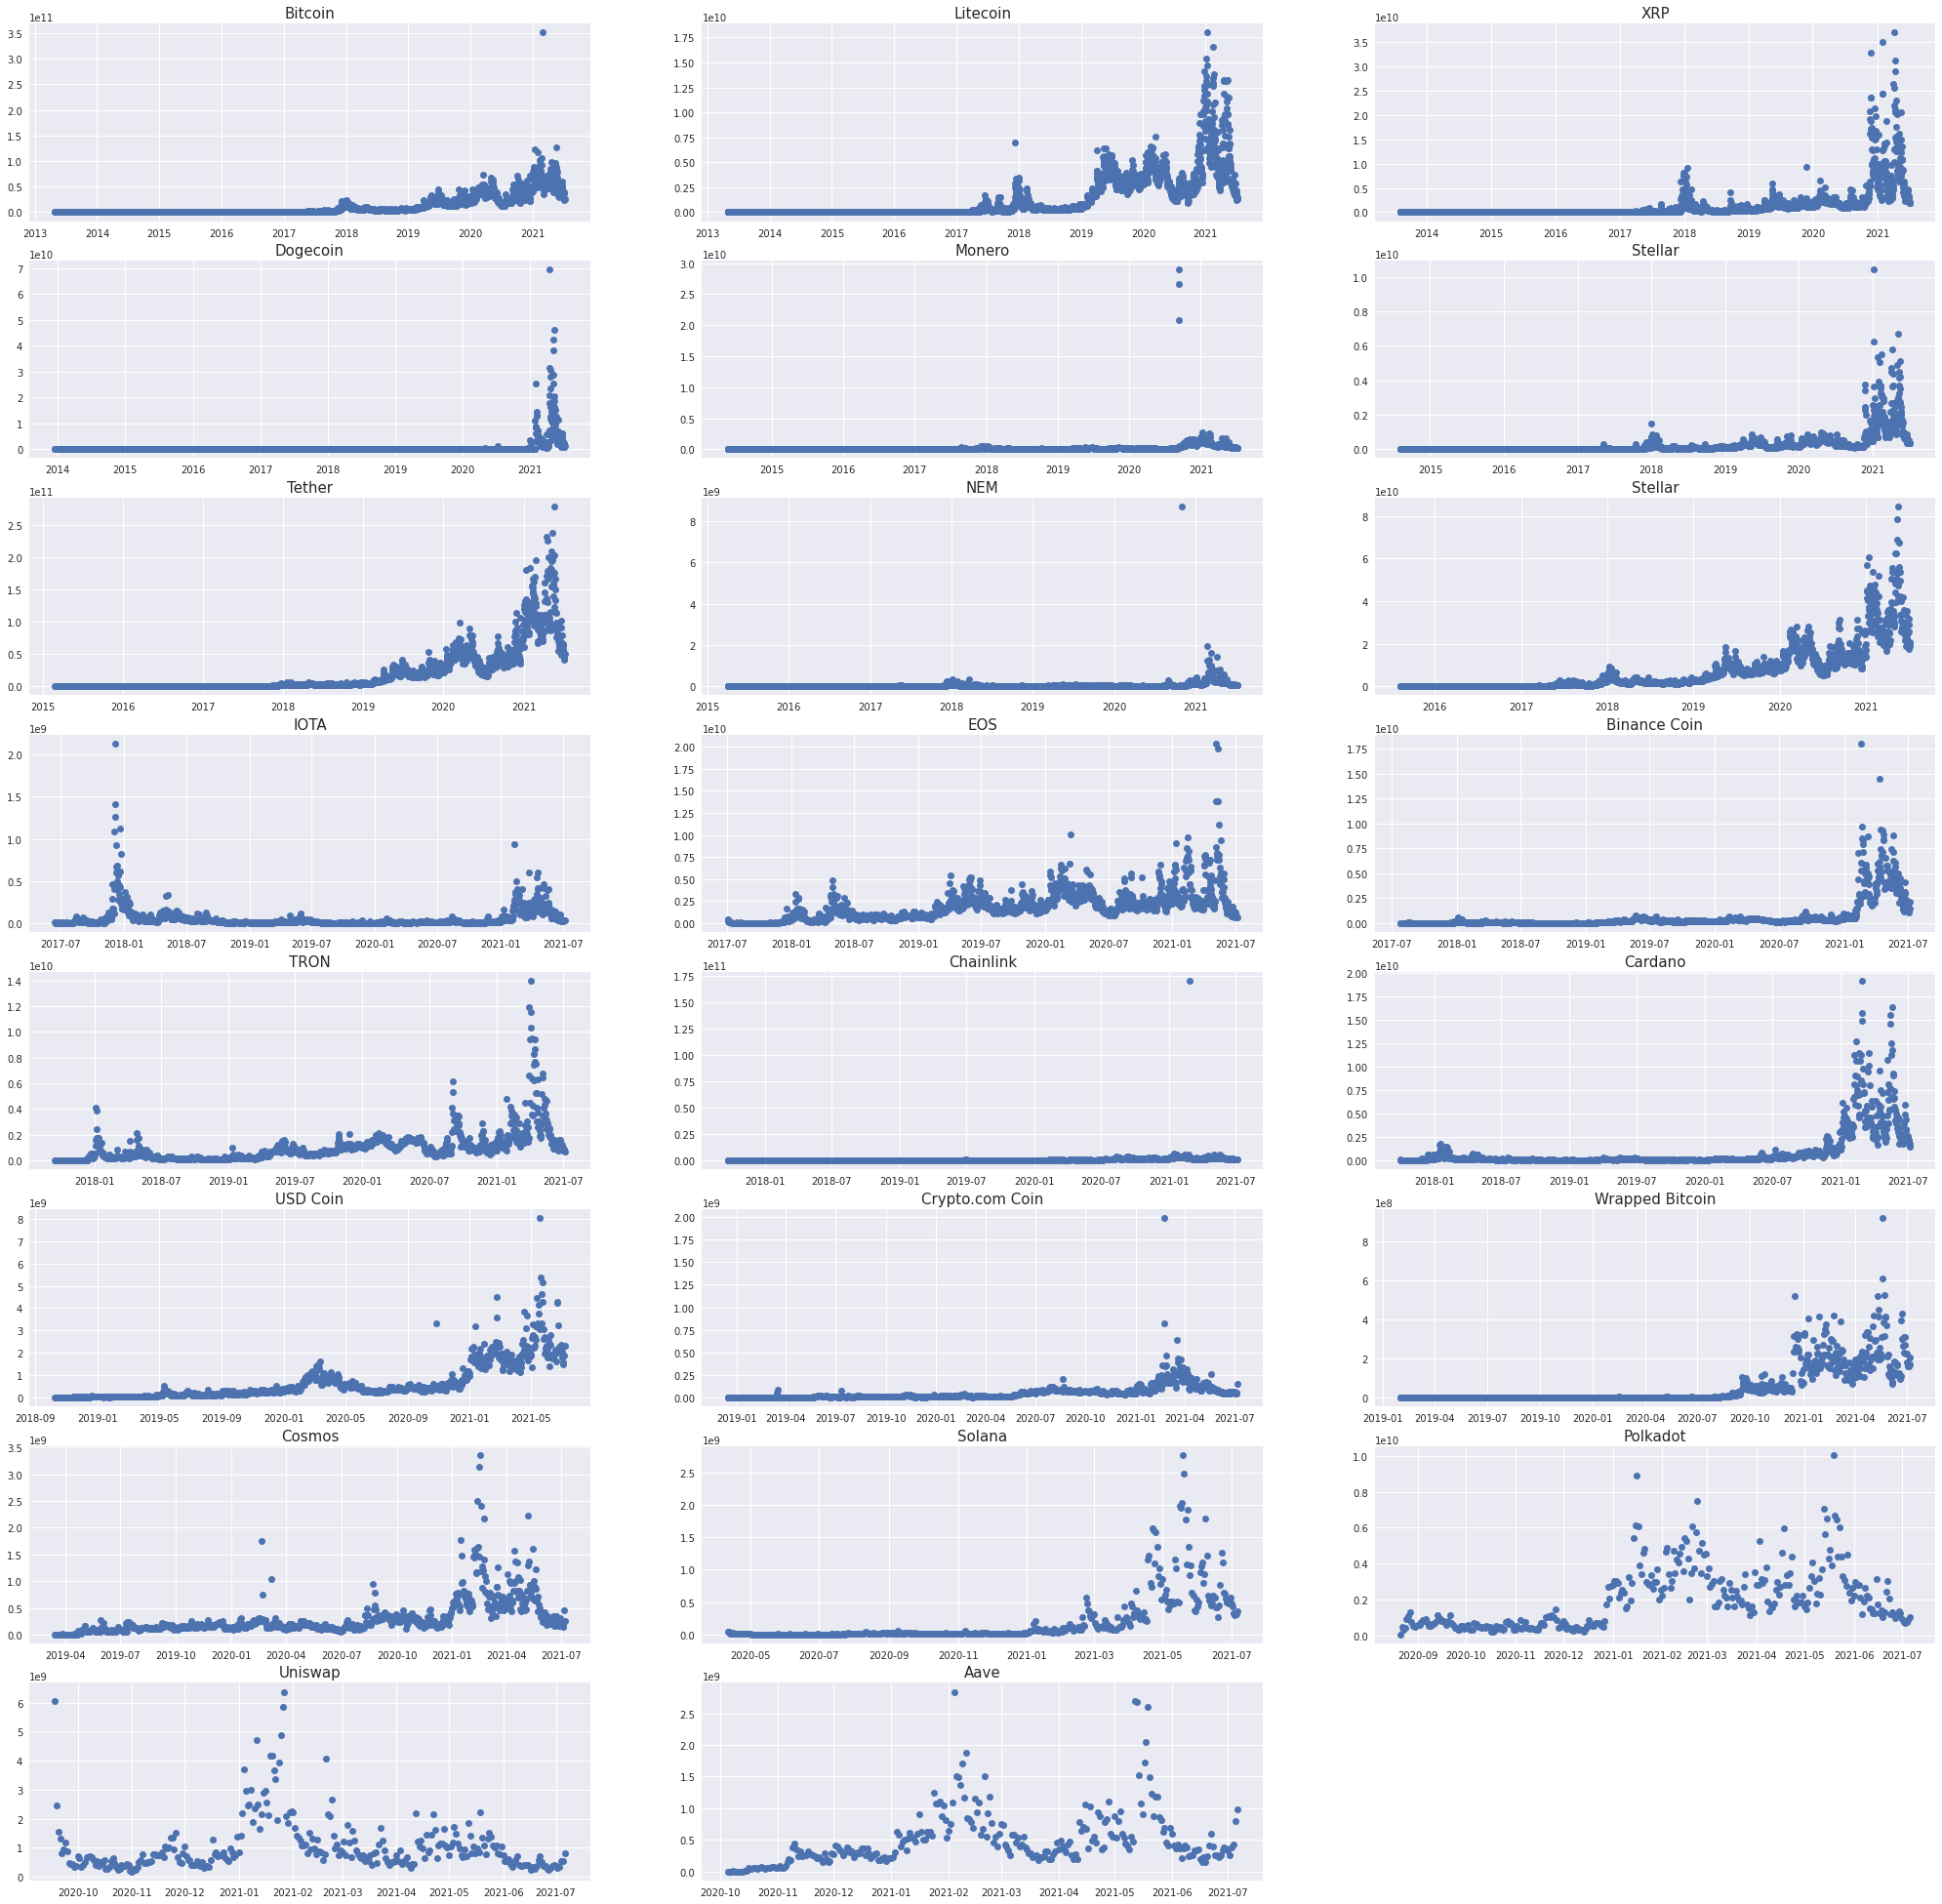

In [ ]:
#Create group of subplots containing volume/time data
fig = plt.figure(figsize=(35,35))
ax1 = plt.subplot2grid((8,3), (0,0))
ax1.plot_date(sub_date['Bitcoin'], sub_volume['Bitcoin'])
ax1.set_title('Bitcoin', fontsize = 15)

ax2 = plt.subplot2grid((8,3), (0,1))
ax2.plot_date(sub_date['Litecoin'], sub_volume['Litecoin'])
ax2.set_title('Litecoin', fontsize = 15)

ax3 = plt.subplot2grid((8,3), (0,2))
ax3.plot_date(sub_date['XRP'], sub_volume['XRP'])
ax3.set_title('XRP', fontsize = 15)

ax4 = plt.subplot2grid((8,3), (1,0))
ax4.plot_date(sub_date['Dogecoin'], sub_volume['Dogecoin'])
ax4.set_title('Dogecoin', fontsize = 15)

ax5 = plt.subplot2grid((8,3), (1,1))
ax5.plot_date(sub_date['Monero'], sub_volume['Monero'])
ax5.set_title('Monero', fontsize = 15)

ax6 = plt.subplot2grid((8,3), (1,2))
ax6.plot_date(sub_date['Stellar'], sub_volume['Stellar'])
ax6.set_title('Stellar', fontsize = 15)

ax7 = plt.subplot2grid((8,3), (2,0))
ax7.plot_date(sub_date['Tether'], sub_volume['Tether'])
ax7.set_title('Tether', fontsize = 15)

ax8 = plt.subplot2grid((8,3), (2,1))
ax8.plot_date(sub_date['NEM'], sub_volume['NEM'])
ax8.set_title('NEM', fontsize = 15)

ax9 = plt.subplot2grid((8,3), (2,2))
ax9.plot_date(sub_date['Ethereum'], sub_volume['Ethereum'])
ax9.set_title('Stellar', fontsize = 15)

ax10 = plt.subplot2grid((8,3), (3,0))
ax10.plot_date(sub_date['IOTA'], sub_volume['IOTA'])
ax10.set_title('IOTA', fontsize = 15)

ax11 = plt.subplot2grid((8,3), (3,1))
ax11.plot_date(sub_date['EOS'], sub_volume['EOS'])
ax11.set_title('EOS', fontsize = 15)

ax12 = plt.subplot2grid((8,3), (3,2))
ax12.plot_date(sub_date['Binance Coin'], sub_volume['Binance Coin'])
ax12.set_title('Binance Coin', fontsize = 15)

ax13 = plt.subplot2grid((8,3), (4,0))
ax13.plot_date(sub_date['TRON'], sub_volume['TRON'])
ax13.set_title('TRON', fontsize = 15)

ax14 = plt.subplot2grid((8,3), (4,1))
ax14.plot_date(sub_date['Chainlink'], sub_volume['Chainlink'])
ax14.set_title('Chainlink', fontsize = 15)

ax15 = plt.subplot2grid((8,3), (4,2))
ax15.plot_date(sub_date['Cardano'], sub_volume['Cardano'])
ax15.set_title('Cardano', fontsize = 15)

ax16 = plt.subplot2grid((8,3), (5,0))
ax16.plot_date(sub_date['USD Coin'], sub_volume['USD Coin'])
ax16.set_title('USD Coin', fontsize = 15)

ax17 = plt.subplot2grid((8,3), (5,1))
ax17.plot_date(sub_date['Crypto.com Coin'], sub_volume['Crypto.com Coin'])
ax17.set_title('Crypto.com Coin', fontsize = 15)


ax18 = plt.subplot2grid((8,3), (5,2))
ax18.plot_date(sub_date['Wrapped Bitcoin'], sub_volume['Wrapped Bitcoin'])
ax18.set_title('Wrapped Bitcoin', fontsize = 15)

ax19 = plt.subplot2grid((8,3), (6,0))
ax19.plot_date(sub_date['Cosmos'], sub_volume['Cosmos'])
ax19.set_title('Cosmos', fontsize = 15)

ax20 = plt.subplot2grid((8,3), (6,1))
ax20.plot_date(sub_date['Solana'], sub_volume['Solana'])
ax20.set_title('Solana', fontsize = 15)

ax21 = plt.subplot2grid((8,3), (6,2))
ax21.plot_date(sub_date['Polkadot'], sub_volume['Polkadot'])
ax21.set_title('Polkadot', fontsize = 15)

ax22 = plt.subplot2grid((8,3), (7,0))
ax22.plot_date(sub_date['Uniswap'], sub_volume['Uniswap'])
ax22.set_title('Uniswap', fontsize = 15)

ax23 = plt.subplot2grid((8,3), (7,1))
ax23.plot_date(sub_date['Aave'], sub_volume['Aave'])
ax23.set_title('Aave', fontsize = 15)

#### 5- Subplots for all coins showing closing price over time

Text(0.5, 1.0, 'Aave')

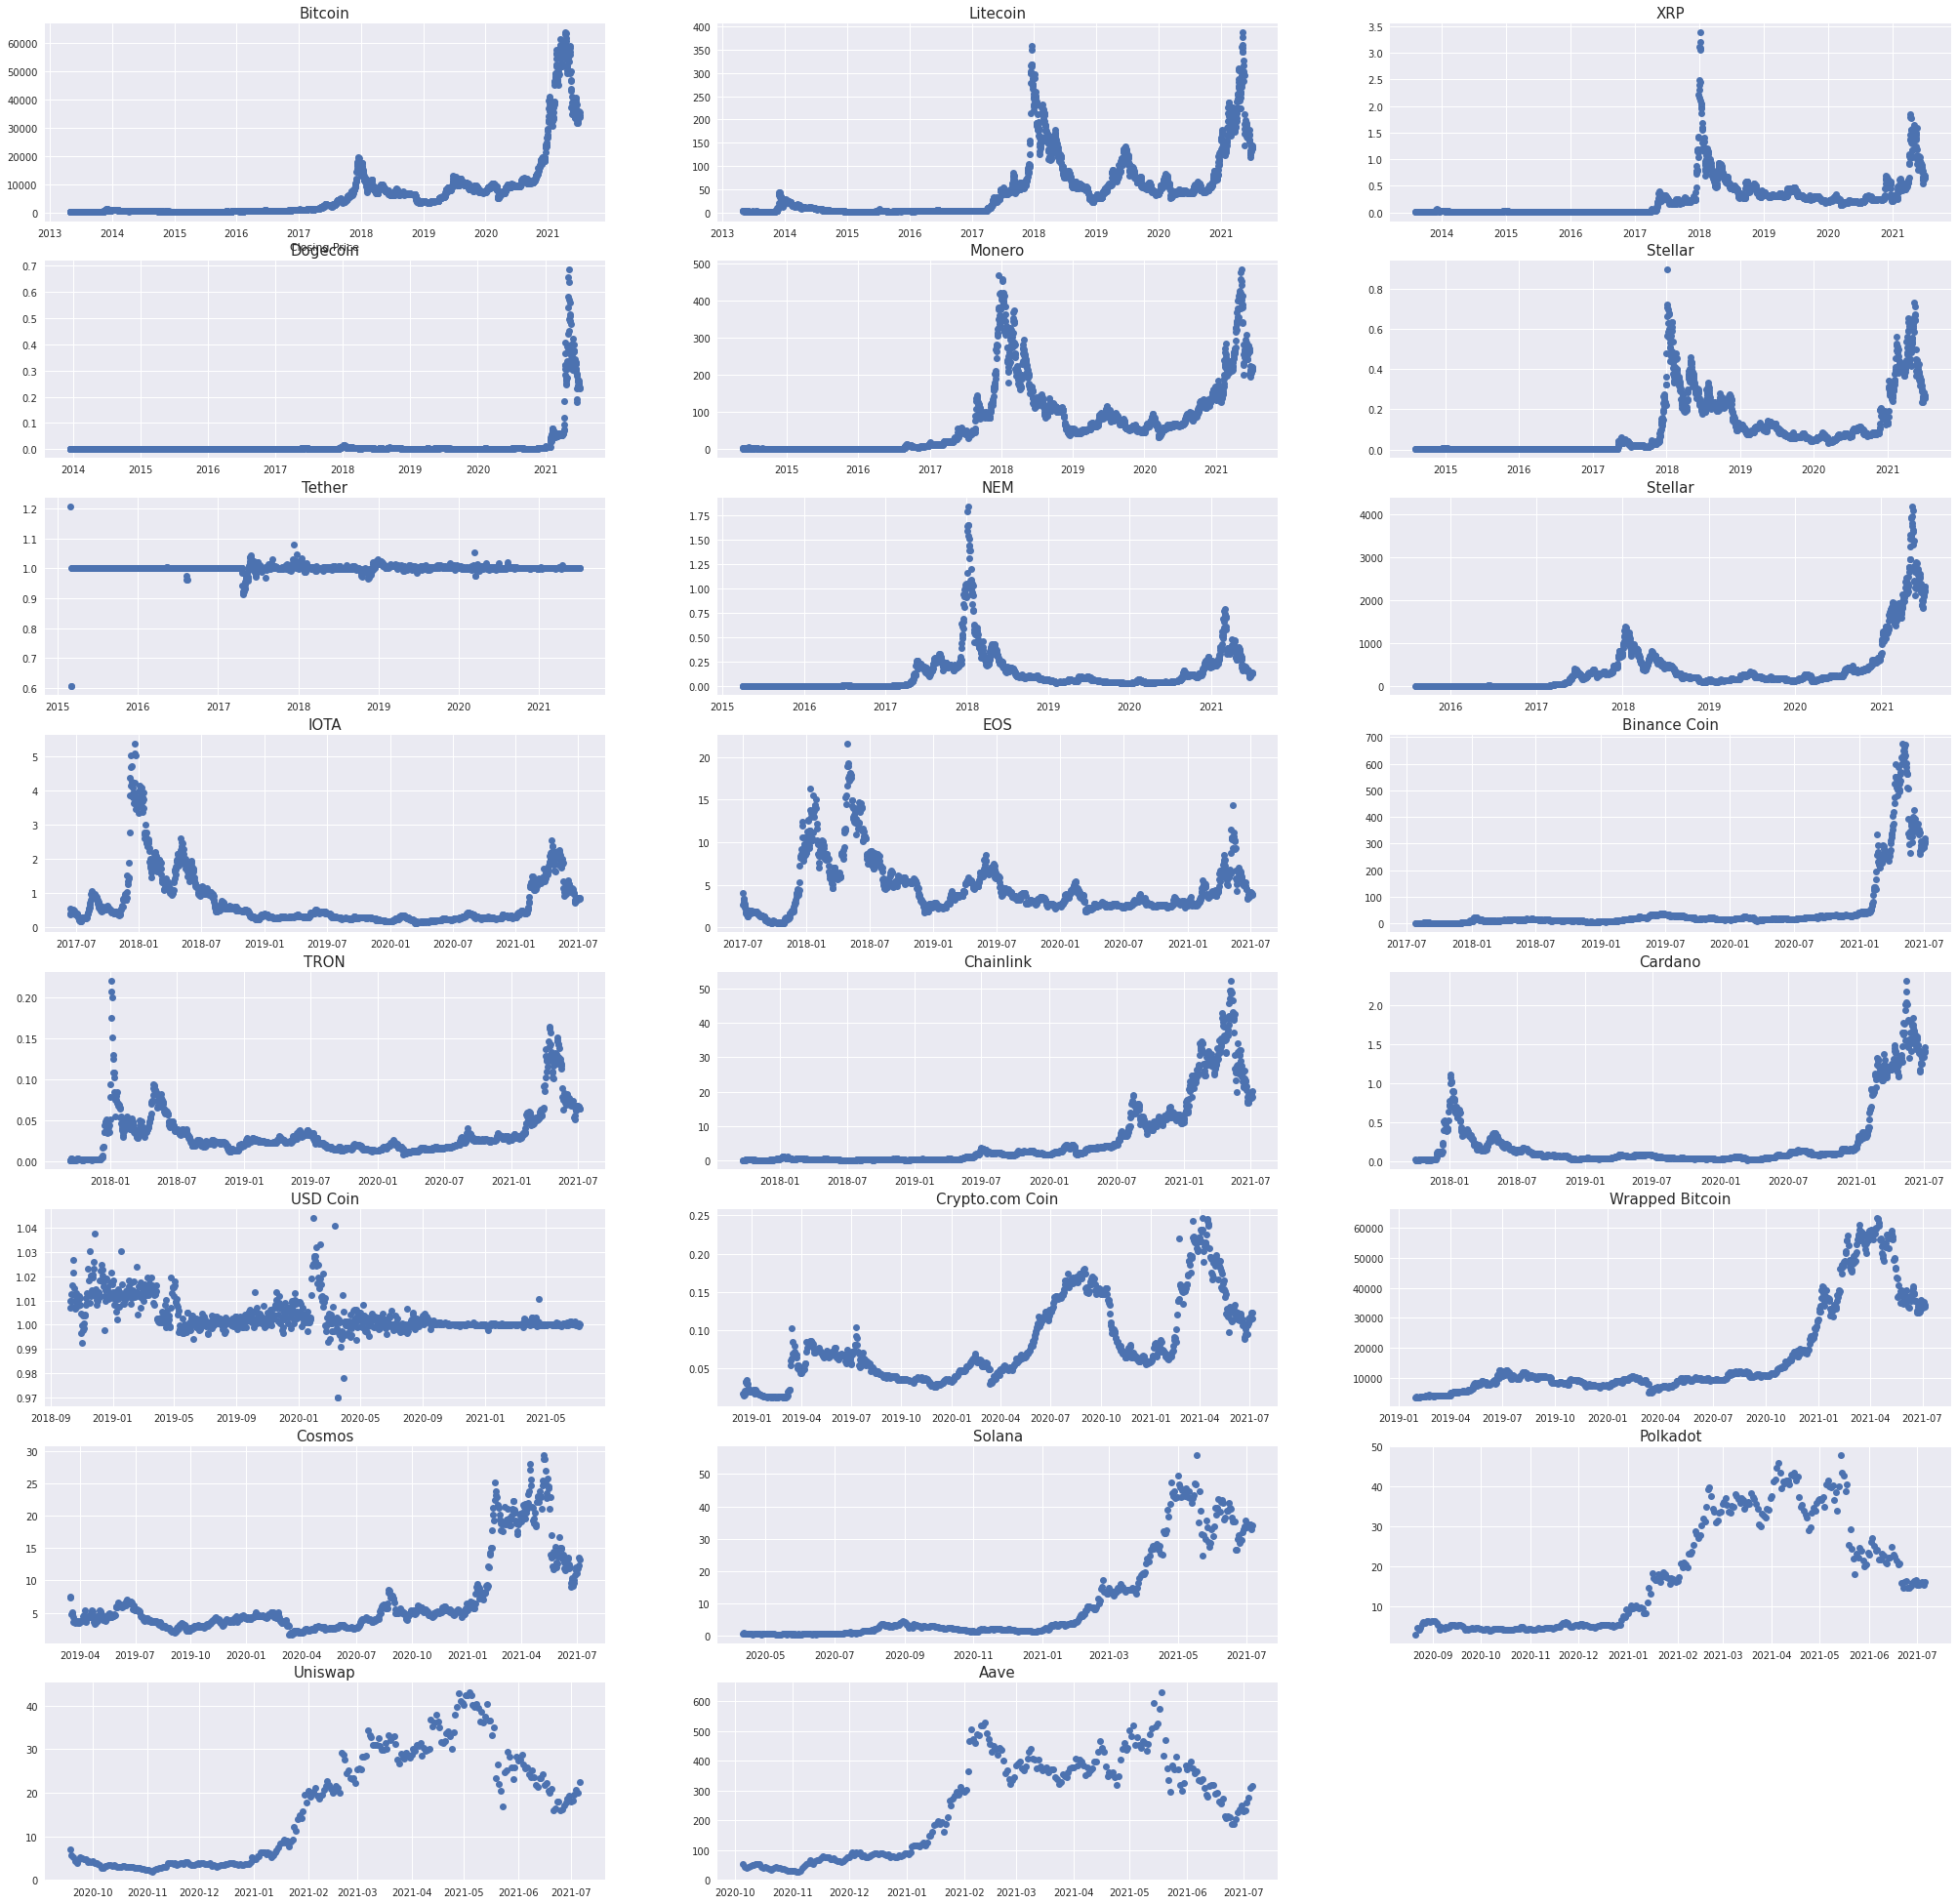

In [ ]:
# Create group of subplots containing closing price/time data
fig = plt.figure(figsize=(35, 35))
ax1 = plt.subplot2grid((8, 3), (0, 0))
ax1.plot_date(sub_date["Bitcoin"], sub_closing["Bitcoin"])
ax1.set_title("Bitcoin", fontsize=15)
ax1.set_xlabel("Closing Price")

ax2 = plt.subplot2grid((8, 3), (0, 1))
ax2.plot_date(sub_date["Litecoin"], sub_closing["Litecoin"])
ax2.set_title("Litecoin", fontsize=15)

ax3 = plt.subplot2grid((8, 3), (0, 2))
ax3.plot_date(sub_date["XRP"], sub_closing["XRP"])
ax3.set_title("XRP", fontsize=15)

ax4 = plt.subplot2grid((8, 3), (1, 0))
ax4.plot_date(sub_date["Dogecoin"], sub_closing["Dogecoin"])
ax4.set_title("Dogecoin", fontsize=15)

ax5 = plt.subplot2grid((8, 3), (1, 1))
ax5.plot_date(sub_date["Monero"], sub_closing["Monero"])
ax5.set_title("Monero", fontsize=15)

ax6 = plt.subplot2grid((8, 3), (1, 2))
ax6.plot_date(sub_date["Stellar"], sub_closing["Stellar"])
ax6.set_title("Stellar", fontsize=15)

ax7 = plt.subplot2grid((8, 3), (2, 0))
ax7.plot_date(sub_date["Tether"], sub_closing["Tether"])
ax7.set_title("Tether", fontsize=15)

ax8 = plt.subplot2grid((8, 3), (2, 1))
ax8.plot_date(sub_date["NEM"], sub_closing["NEM"])
ax8.set_title("NEM", fontsize=15)

ax9 = plt.subplot2grid((8, 3), (2, 2))
ax9.plot_date(sub_date["Ethereum"], sub_closing["Ethereum"])
ax9.set_title("Stellar", fontsize=15)

ax10 = plt.subplot2grid((8, 3), (3, 0))
ax10.plot_date(sub_date["IOTA"], sub_closing["IOTA"])
ax10.set_title("IOTA", fontsize=15)

ax11 = plt.subplot2grid((8, 3), (3, 1))
ax11.plot_date(sub_date["EOS"], sub_closing["EOS"])
ax11.set_title("EOS", fontsize=15)

ax12 = plt.subplot2grid((8, 3), (3, 2))
ax12.plot_date(sub_date["Binance Coin"], sub_closing["Binance Coin"])
ax12.set_title("Binance Coin", fontsize=15)

ax13 = plt.subplot2grid((8, 3), (4, 0))
ax13.plot_date(sub_date["TRON"], sub_closing["TRON"])
ax13.set_title("TRON", fontsize=15)

ax14 = plt.subplot2grid((8, 3), (4, 1))
ax14.plot_date(sub_date["Chainlink"], sub_closing["Chainlink"])
ax14.set_title("Chainlink", fontsize=15)

ax15 = plt.subplot2grid((8, 3), (4, 2))
ax15.plot_date(sub_date["Cardano"], sub_closing["Cardano"])
ax15.set_title("Cardano", fontsize=15)

ax16 = plt.subplot2grid((8, 3), (5, 0))
ax16.plot_date(sub_date["USD Coin"], sub_closing["USD Coin"])
ax16.set_title("USD Coin", fontsize=15)

ax17 = plt.subplot2grid((8, 3), (5, 1))
ax17.plot_date(sub_date["Crypto.com Coin"], sub_closing["Crypto.com Coin"])
ax17.set_title("Crypto.com Coin", fontsize=15)


ax18 = plt.subplot2grid((8, 3), (5, 2))
ax18.plot_date(sub_date["Wrapped Bitcoin"], sub_closing["Wrapped Bitcoin"])
ax18.set_title("Wrapped Bitcoin", fontsize=15)

ax19 = plt.subplot2grid((8, 3), (6, 0))
ax19.plot_date(sub_date["Cosmos"], sub_closing["Cosmos"])
ax19.set_title("Cosmos", fontsize=15)

ax20 = plt.subplot2grid((8, 3), (6, 1))
ax20.plot_date(sub_date["Solana"], sub_closing["Solana"])
ax20.set_title("Solana", fontsize=15)

ax21 = plt.subplot2grid((8, 3), (6, 2))
ax21.plot_date(sub_date["Polkadot"], sub_closing["Polkadot"])
ax21.set_title("Polkadot", fontsize=15)

ax22 = plt.subplot2grid((8, 3), (7, 0))
ax22.plot_date(sub_date["Uniswap"], sub_closing["Uniswap"])
ax22.set_title("Uniswap", fontsize=15)

ax23 = plt.subplot2grid((8, 3), (7, 1))
ax23.plot_date(sub_date["Aave"], sub_closing["Aave"])
ax23.set_title("Aave", fontsize=15)


#### 6- Subplots for all coins showing Marketcap over time

Text(0.5, 1.0, 'Aave')

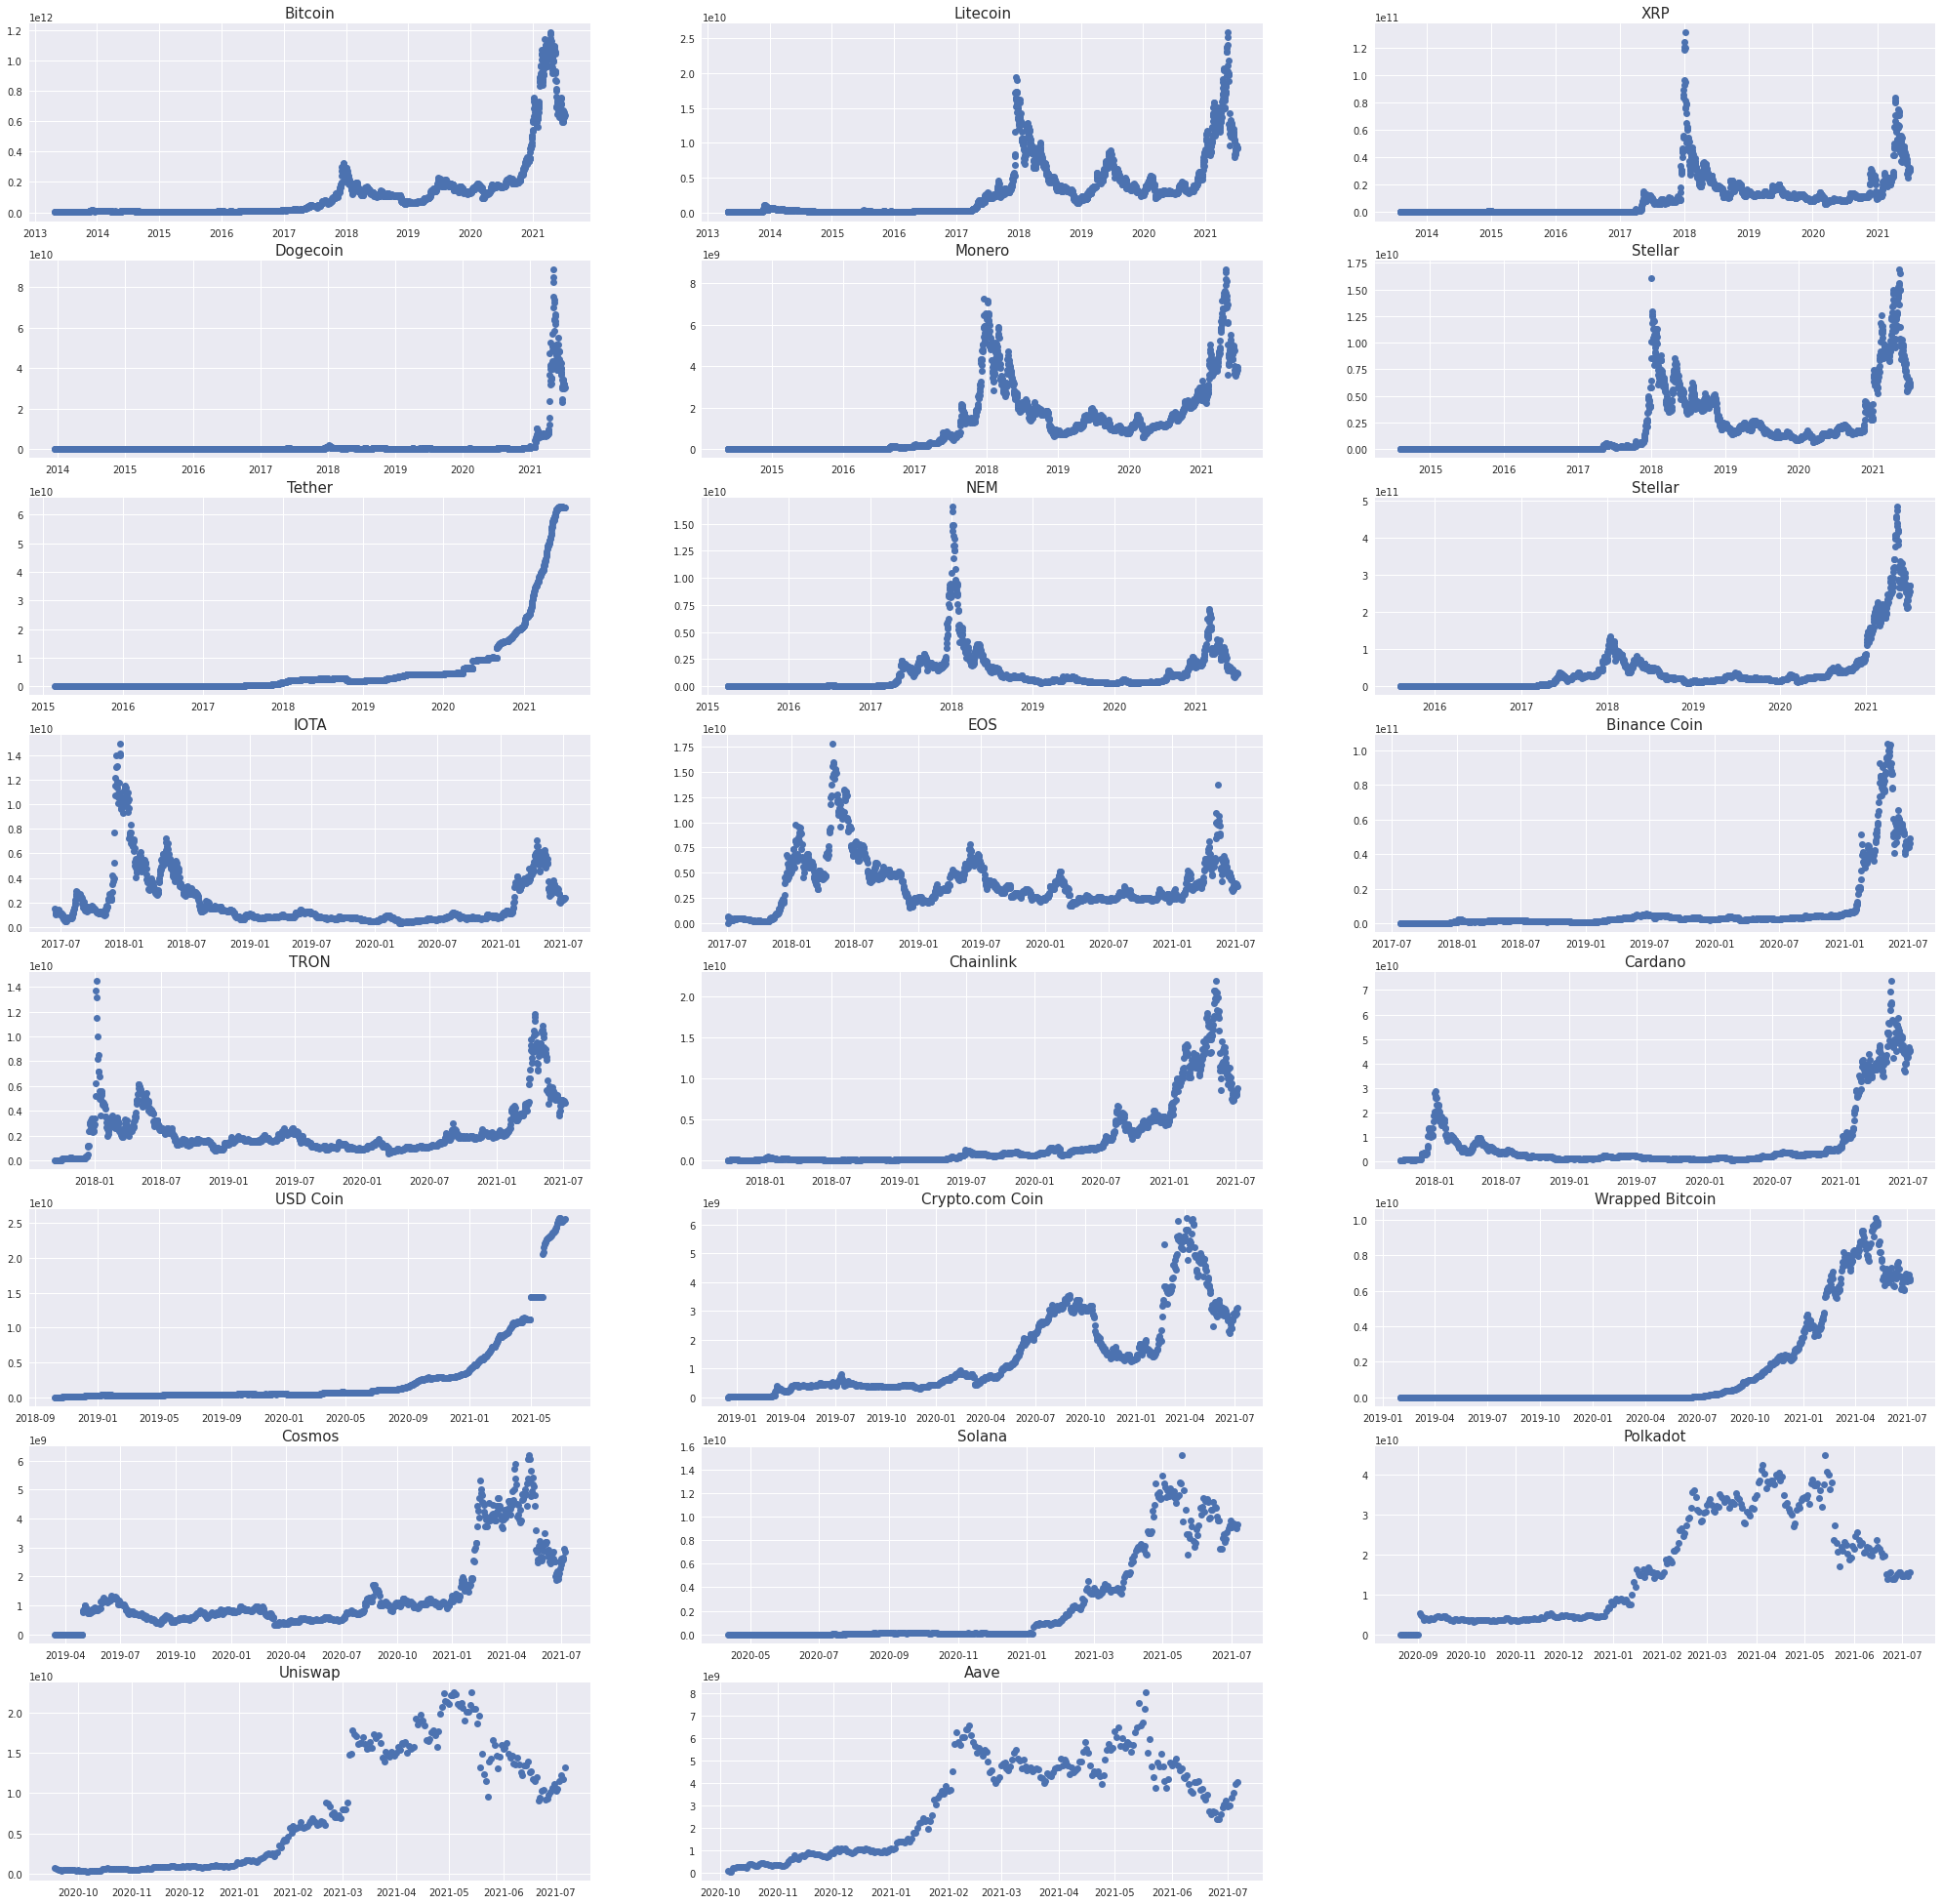

In [ ]:
#Create group of subplots containing marketcap/time data
fig = plt.figure(figsize=(35,35))
ax1 = plt.subplot2grid((8,3), (0,0))
ax1.plot_date(sub_date['Bitcoin'], sub_market['Bitcoin'])
ax1.set_title('Bitcoin', fontsize = 15)

ax2 = plt.subplot2grid((8,3), (0,1))
ax2.plot_date(sub_date['Litecoin'], sub_market['Litecoin'])
ax2.set_title('Litecoin', fontsize = 15)

ax3 = plt.subplot2grid((8,3), (0,2))
ax3.plot_date(sub_date['XRP'], sub_market['XRP'])
ax3.set_title('XRP', fontsize = 15)

ax4 = plt.subplot2grid((8,3), (1,0))
ax4.plot_date(sub_date['Dogecoin'], sub_market['Dogecoin'])
ax4.set_title('Dogecoin', fontsize = 15)

ax5 = plt.subplot2grid((8,3), (1,1))
ax5.plot_date(sub_date['Monero'], sub_market['Monero'])
ax5.set_title('Monero', fontsize = 15)

ax6 = plt.subplot2grid((8,3), (1,2))
ax6.plot_date(sub_date['Stellar'], sub_market['Stellar'])
ax6.set_title('Stellar', fontsize = 15)

ax7 = plt.subplot2grid((8,3), (2,0))
ax7.plot_date(sub_date['Tether'], sub_market['Tether'])
ax7.set_title('Tether', fontsize = 15)

ax8 = plt.subplot2grid((8,3), (2,1))
ax8.plot_date(sub_date['NEM'], sub_market['NEM'])
ax8.set_title('NEM', fontsize = 15)

ax9 = plt.subplot2grid((8,3), (2,2))
ax9.plot_date(sub_date['Ethereum'], sub_market['Ethereum'])
ax9.set_title('Stellar', fontsize = 15)

ax10 = plt.subplot2grid((8,3), (3,0))
ax10.plot_date(sub_date['IOTA'], sub_market['IOTA'])
ax10.set_title('IOTA', fontsize = 15)

ax11 = plt.subplot2grid((8,3), (3,1))
ax11.plot_date(sub_date['EOS'], sub_market['EOS'])
ax11.set_title('EOS', fontsize = 15)

ax12 = plt.subplot2grid((8,3), (3,2))
ax12.plot_date(sub_date['Binance Coin'], sub_market['Binance Coin'])
ax12.set_title('Binance Coin', fontsize = 15)

ax13 = plt.subplot2grid((8,3), (4,0))
ax13.plot_date(sub_date['TRON'], sub_market['TRON'])
ax13.set_title('TRON', fontsize = 15)

ax14 = plt.subplot2grid((8,3), (4,1))
ax14.plot_date(sub_date['Chainlink'], sub_market['Chainlink'])
ax14.set_title('Chainlink', fontsize = 15)

ax15 = plt.subplot2grid((8,3), (4,2))
ax15.plot_date(sub_date['Cardano'], sub_market['Cardano'])
ax15.set_title('Cardano', fontsize = 15)

ax16 = plt.subplot2grid((8,3), (5,0))
ax16.plot_date(sub_date['USD Coin'], sub_market['USD Coin'])
ax16.set_title('USD Coin', fontsize = 15)

ax17 = plt.subplot2grid((8,3), (5,1))
ax17.plot_date(sub_date['Crypto.com Coin'], sub_market['Crypto.com Coin'])
ax17.set_title('Crypto.com Coin', fontsize = 15)


ax18 = plt.subplot2grid((8,3), (5,2))
ax18.plot_date(sub_date['Wrapped Bitcoin'], sub_market['Wrapped Bitcoin'])
ax18.set_title('Wrapped Bitcoin', fontsize = 15)

ax19 = plt.subplot2grid((8,3), (6,0))
ax19.plot_date(sub_date['Cosmos'], sub_market['Cosmos'])
ax19.set_title('Cosmos', fontsize = 15)

ax20 = plt.subplot2grid((8,3), (6,1))
ax20.plot_date(sub_date['Solana'], sub_market['Solana'])
ax20.set_title('Solana', fontsize = 15)

ax21 = plt.subplot2grid((8,3), (6,2))
ax21.plot_date(sub_date['Polkadot'], sub_market['Polkadot'])
ax21.set_title('Polkadot', fontsize = 15)

ax22 = plt.subplot2grid((8,3), (7,0))
ax22.plot_date(sub_date['Uniswap'], sub_market['Uniswap'])
ax22.set_title('Uniswap', fontsize = 15)

ax23 = plt.subplot2grid((8,3), (7,1))
ax23.plot_date(sub_date['Aave'], sub_market['Aave'])
ax23.set_title('Aave', fontsize = 15)

### (4) Conjectuers:
* Coin with an age of 5 or greater are more stable investments.
* Coin with a volatility greater than 7% should be excluded.
* Coin must beat the S&P 500.

[5.44, 4.98, 6.84, 9.19, 6.5, 5.88, 0.07, 7.29, 5.56, 6.37, 5.85, 6.57, 7.03, 5.44, 0.06, 5.55, 4.93, 7.19, 7.01, 6.87, 7.27, 8.08]


<function matplotlib.pyplot.show>

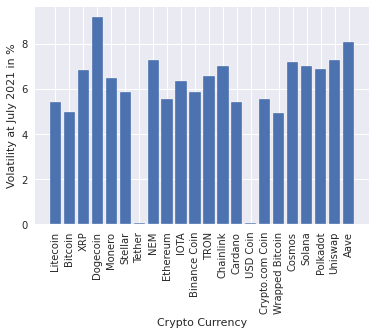

In [46]:
# Compute Volatility of July 2021
crypt_Volatility_July2021 = []
for coin in crypt_name:
    last_30_days = sub_closing[coin][-30:-1]
    change = []
    for i in range(0,len(last_30_days)-1):
        ch = last_30_days[i+1] / last_30_days[i]
        change.append(ch)
    vol = round(np.std(change)*100,2)
    crypt_Volatility_July2021.append(vol)
print(crypt_Volatility_July2021)

plt.bar(x = crypt_name, height = crypt_Volatility_July2021)
plt.xlabel('Crypto Currency')
plt.xticks(rotation = 90)
plt.ylabel('Volatility at July 2021 in %')
plt.show

The crypto currency that has been on the market for more than 8 years: Bitcoin, Litecoin, XRP, Dogecoin.
The crypto currency that has been on the market for more than 7 years: Monero, Stellar.
The crypto currency that has been on the market for more than 6 years: Tether, NEW, Ethereum.
The rest of the crypto currencies has been on the market for less than 5 years


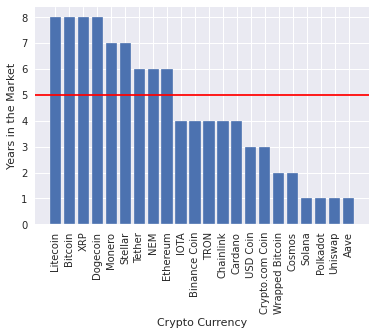

In [47]:
# Discover which crypto-currencies had been on the market for more than 5 years
crypt_period_day = []
for coin in crypt_name:
    p = sub_date[coin][-1] - sub_date[coin][0]
    p = str(p)
    p = p.strip('days 00:00:00')
    crypt_period_day.append(p)
# print(crypt_period_day)
# The last 0 is removed from the first two variables for some reason, need to add it back
crypt_period_day[0] = crypt_period_day[0] + '0'
crypt_period_day[1] = crypt_period_day[1] + '0'
# print(crypt_period_day)
# Convert string in the list to integers
for i in range(0,len(crypt_period_day)):
    crypt_period_day[i] = int(crypt_period_day[i])
# Convert days to years
# print(crypt_period_day)
crypt_period_year = crypt_period_day
for i in range(0,len(crypt_period_year)):
    crypt_period_year[i] = round(crypt_period_year[i]/365)
# print(crypt_period_year)

plt.bar(x = crypt_name, height = crypt_period_year)
plt.xlabel('Crypto Currency')
plt.xticks(rotation = 90)
plt.ylabel('Years in the Market')
plt.axhline(y = 5, color = 'r', linestyle = '-')
plt.show
print('The crypto currency that has been on the market for more than 8 years: Bitcoin, Litecoin, XRP, Dogecoin.')
print('The crypto currency that has been on the market for more than 7 years: Monero, Stellar.')
print('The crypto currency that has been on the market for more than 6 years: Tether, NEW, Ethereum.')
print('The rest of the crypto currencies has been on the market for less than 5 years')

[32, 237, 119, 1145, 106, 98, 1, 426, 3086, 2, 3053, 46, 118, 55, 1, 7, 10, 2, 44, 6, 3, 6]
[0.54, 0.98, 0.82, 1.41, 0.95, 0.93, 0.0, 1.74, 2.82, 0.19, 6.43, 1.6, 2.3, 1.72, 0.0, 0.91, 2.16, 0.41, 43.0, 5.0, 2.0, 5.0]
The crypto currency that has higher annual return than S&P are : Bitcoin, XRP, Dogecoin, Monero, Stellar, NEW, Ethereum, Binance Coin, TRON, Chainlink, Cardano, Crypto.com Coin, Wrapped Bitcoinm, Solana,,Polkadot, Uniswap, Aave.
Notice: the newer crypto currency has noticablly higher annual return, because they have been on the market fot short period.
Maybe plot the annual returns of currecies been around for more than 5 years


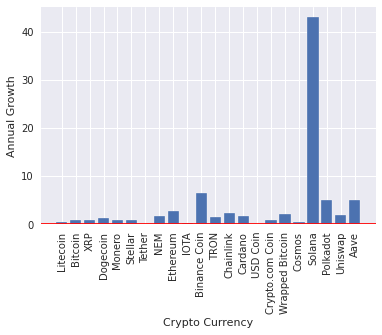

In [42]:
# Discover which crypto-currencies has a annual return higher than the S&P 500, approximately 8% or 0.08
# Calculate the difference between the closing price on the first day recorded and the last day recorded
crypt_growth_total = []
for coin in crypt_name:
    c = round(sub_closing[coin][-1] / sub_closing[coin][0])
    crypt_growth_total.append(c)
print(crypt_growth_total)
# Take the geometric mean of the total growth to calculate annual growth
crypt_growth_annual = crypt_growth_total
for i in range(0,len(crypt_growth_annual)):
    crypt_growth_annual[i] = round(crypt_growth_annual[i]**(1/crypt_period_year[i]) - 1, 2)
print(crypt_growth_annual)

plt.bar(x = crypt_name, height = crypt_growth_annual)
plt.xlabel('Crypto Currency')
plt.xticks(rotation = 90)
plt.ylabel('Annual Growth')
plt.axhline(y = 0.08, color = 'r', linestyle = '-')
plt.show
print('The crypto currency that has higher annual return than S&P are : Bitcoin, XRP, Dogecoin, Monero, Stellar, NEW, Ethereum, Binance Coin, TRON, Chainlink, Cardano, Crypto.com Coin, Wrapped Bitcoinm, Solana,,Polkadot, Uniswap, Aave.')
print('Notice: the newer crypto currency has noticablly higher annual return, because they have been on the market fot short period.')
print('Maybe plot the annual returns of currecies been around for more than 5 years')


The only crypto currency that has been on the market for more than 5 years and does not outperform the S&P is Tether


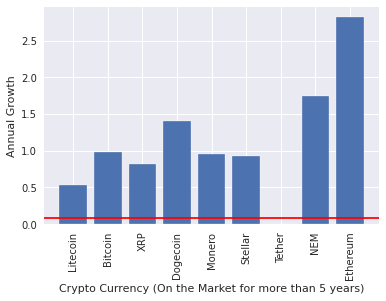

In [43]:
# Plot the annual returns of currecies been around for more than 5 years
plt.bar(x = crypt_name[0:9], height = crypt_growth_annual[0:9])
plt.xlabel('Crypto Currency (On the Market for more than 5 years)')
plt.xticks(rotation = 90)
plt.ylabel('Annual Growth')
plt.axhline(y = 0.08, color = 'r', linestyle = '-')
plt.show

print('The only crypto currency that has been on the market for more than 5 years and does not outperform the S&P is Tether')

### Problem 3: The Model Development Part  (20 points)

**Insert your answers in the cell below** 

**Add as many cells as needed**

Use one of the conjectures as the basis to create a model so that other teams in the company can use your model for new unseen data.


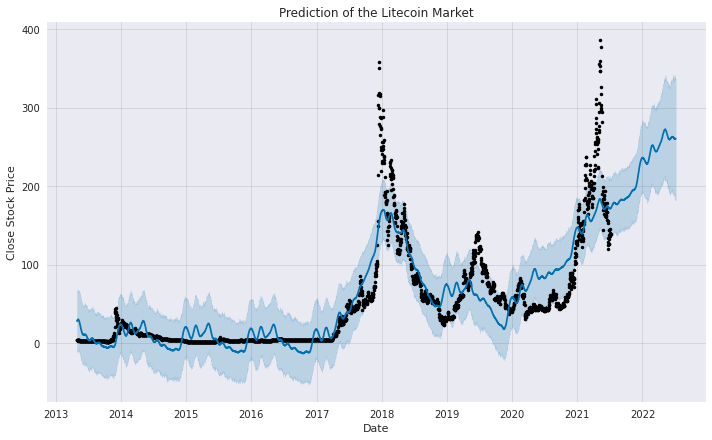

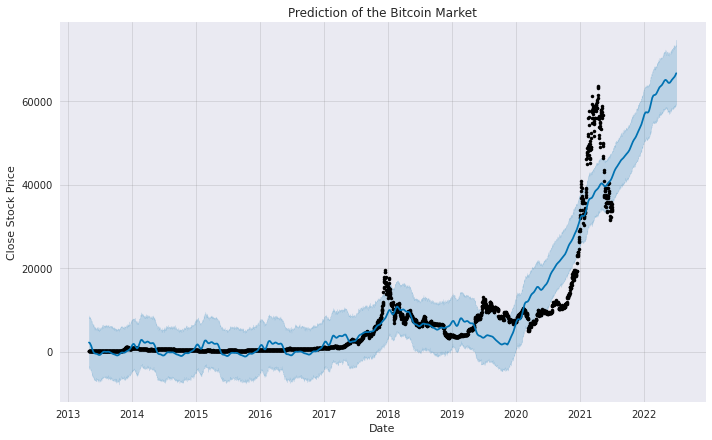

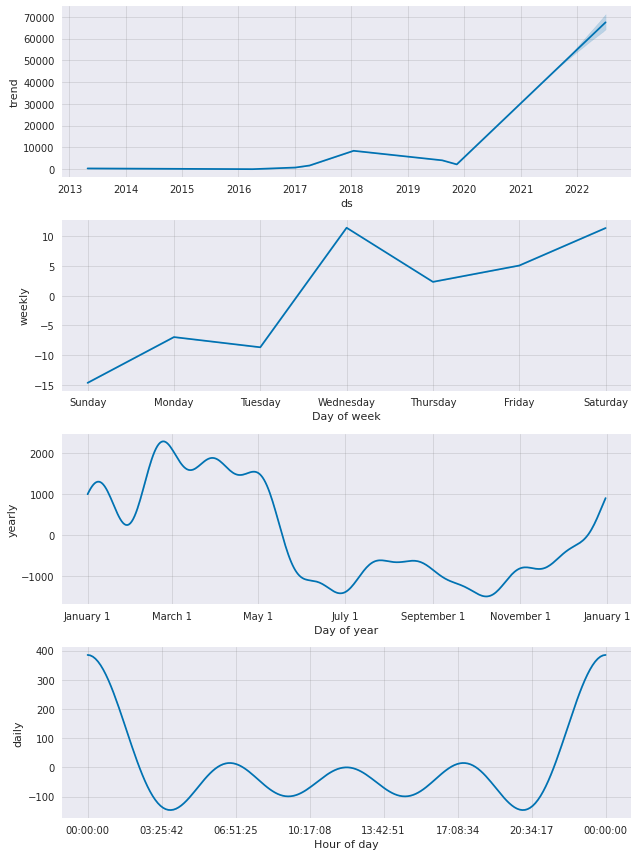

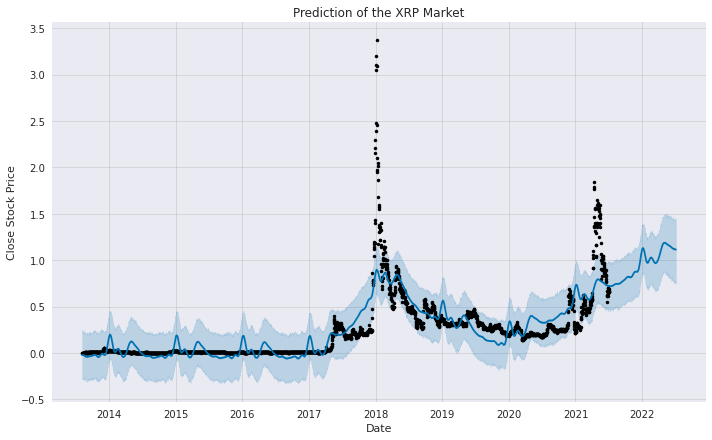

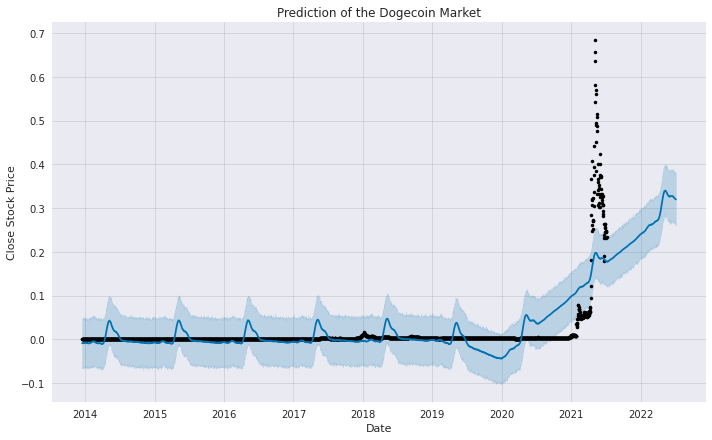

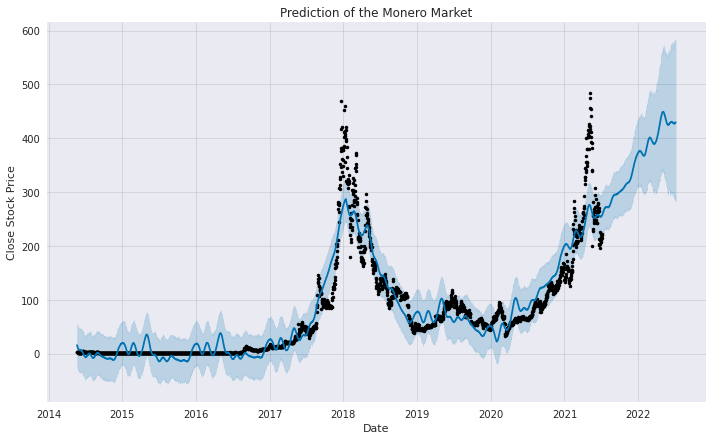

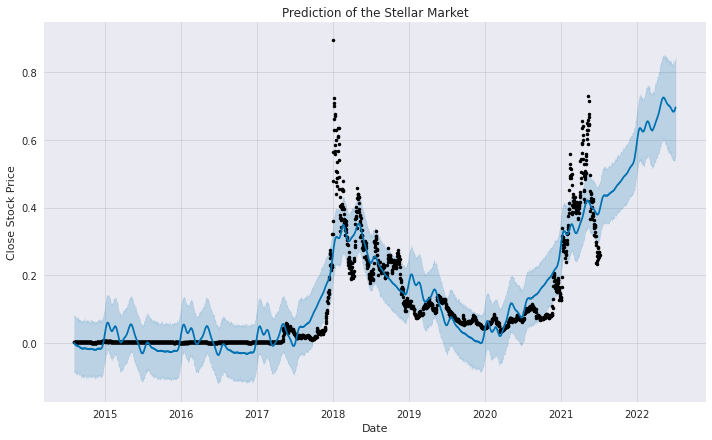

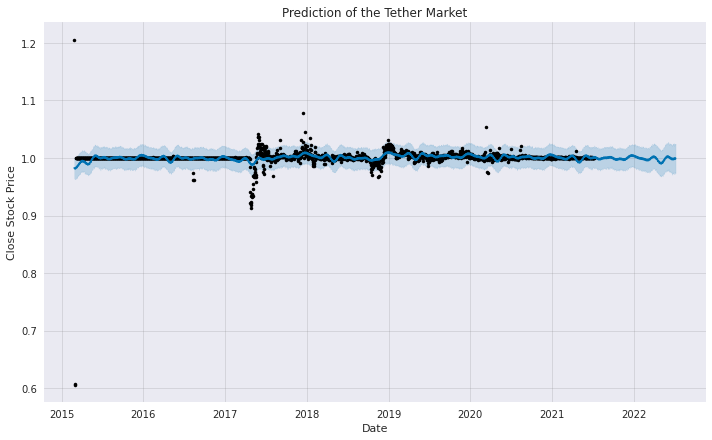

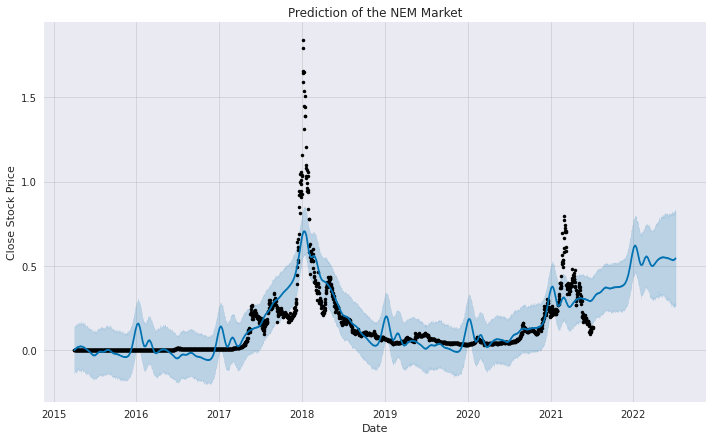

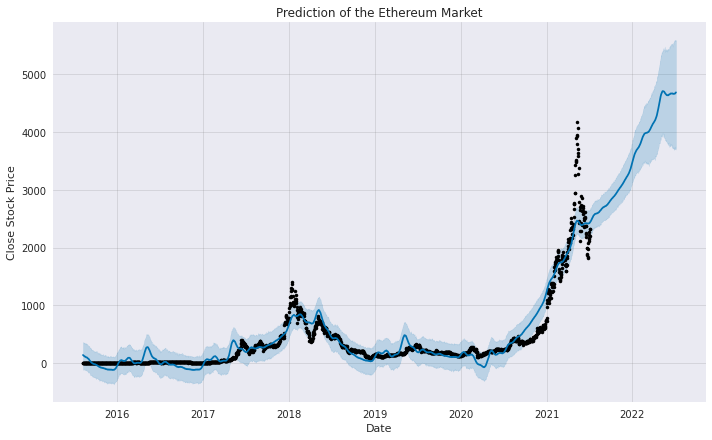

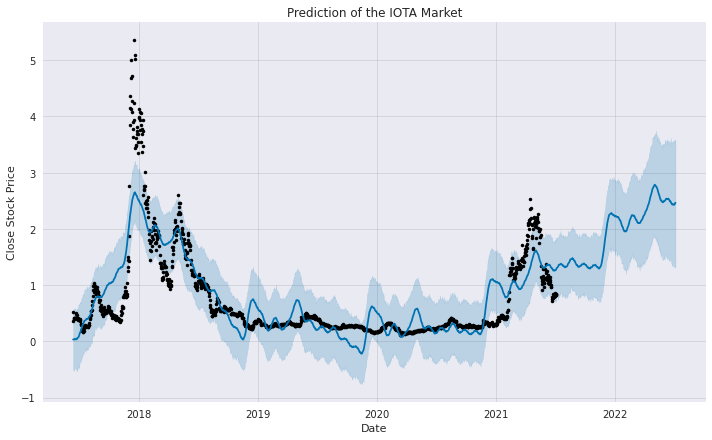

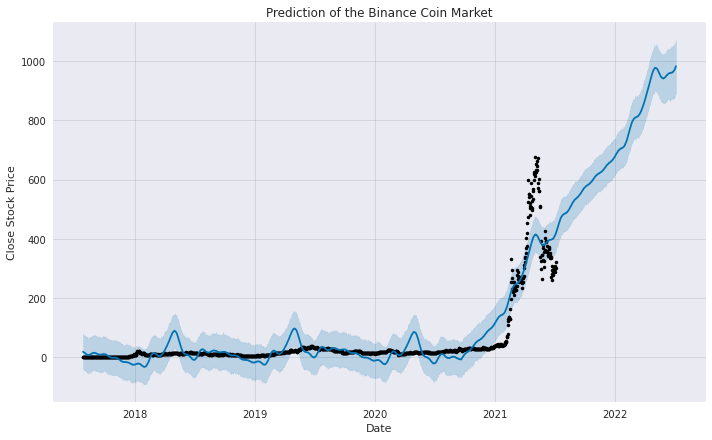

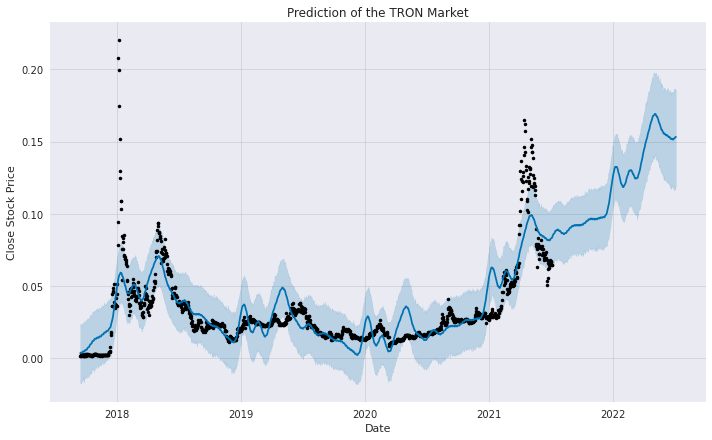

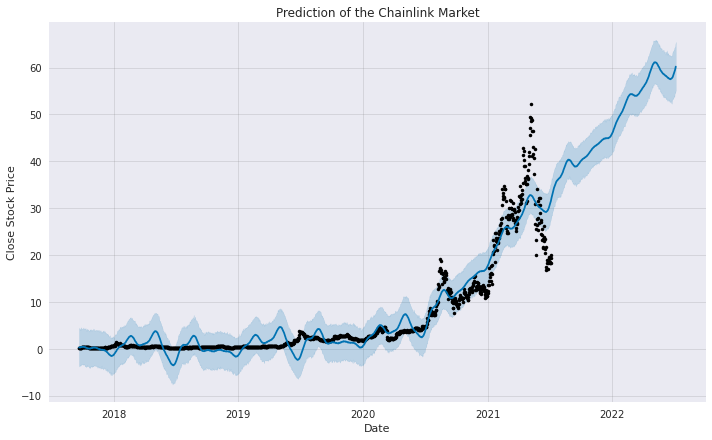

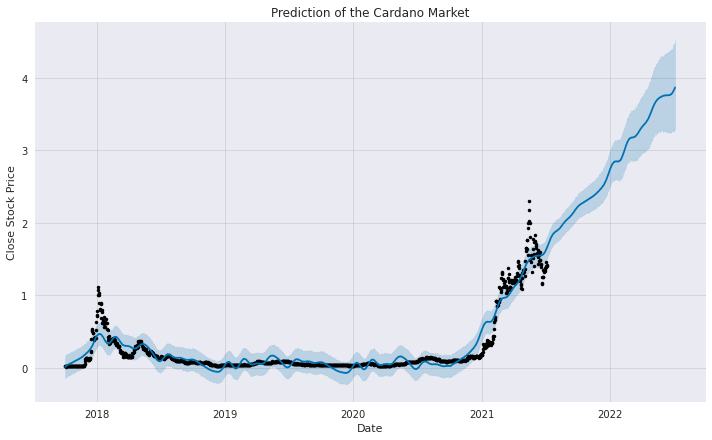

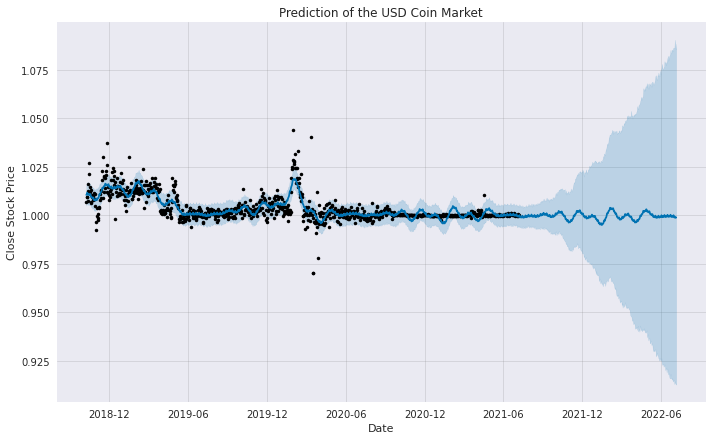

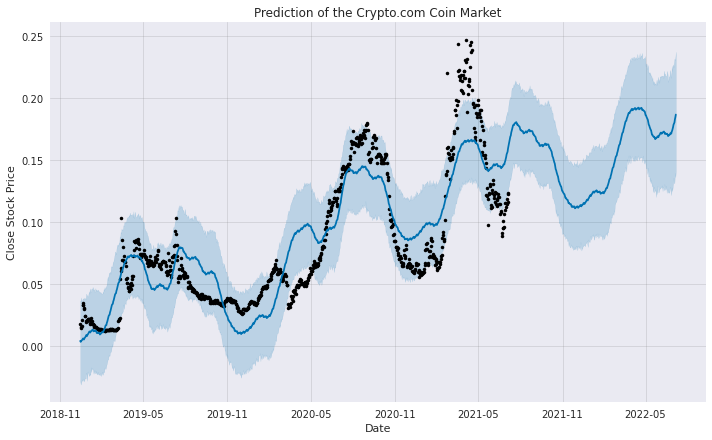

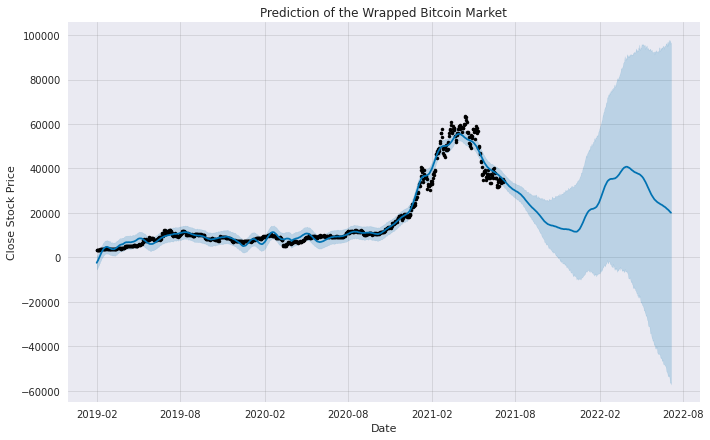

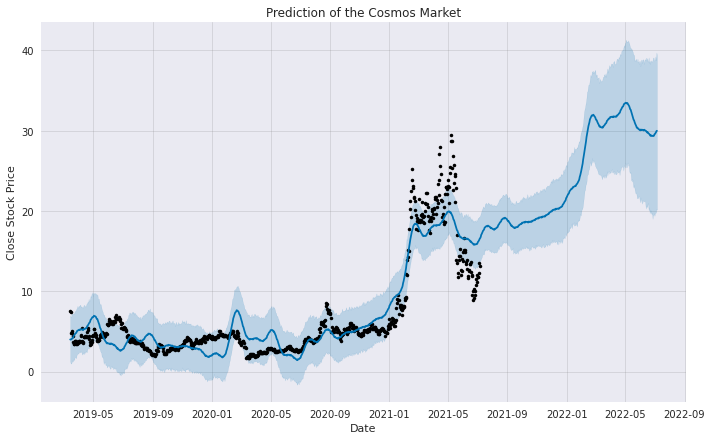

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


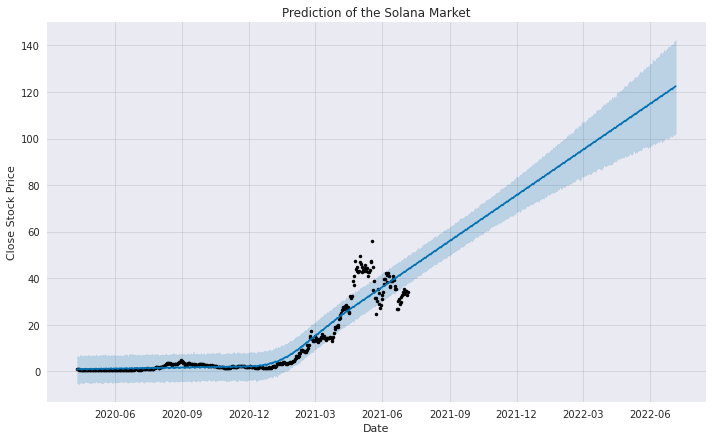

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


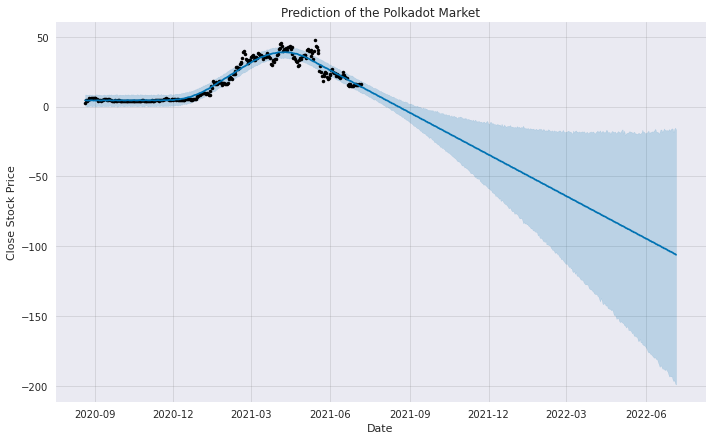

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


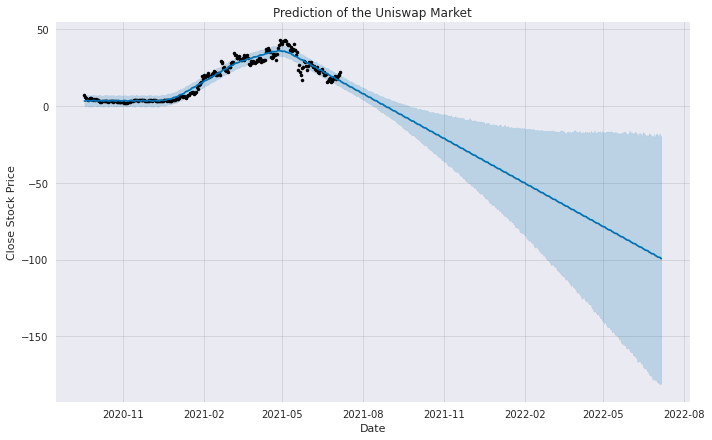

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


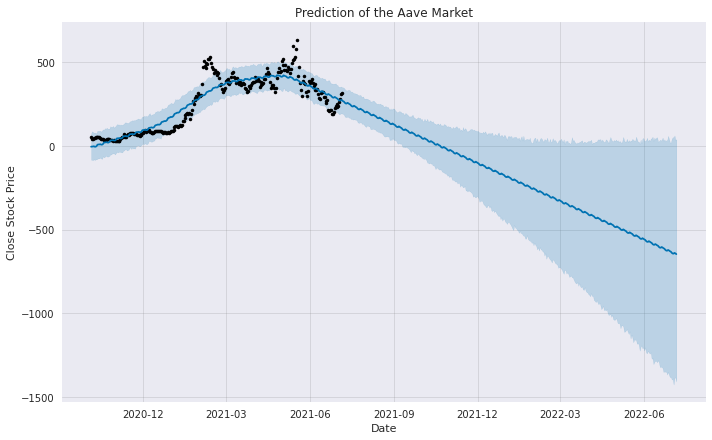

In [68]:
crypt_name = crypt_df['Name'].unique()
# Scatter

for coin in crypt_name:
  coin_data = crypt_df['Name'].isin([coin])
  coin_data_df = crypt_df[coin_data]
  coin_data_df = coin_data_df[["Date","Close"]]
  coin_data_df = coin_data_df.rename(columns = {"Date":"ds","Close":"y"})
  model = Prophet(daily_seasonality=True)
  model.fit(coin_data_df)

  #fbprophet model

  future = model.make_future_dataframe(periods=365) 
  prediction = model.predict(future)
  model.plot(prediction)
  plt.title('Prediction of the %s Market'% coin)
  plt.xlabel("Date")
  plt.ylabel("Close Stock Price")
  plt.show()

  if coin == 'Bitcoin':
    model.plot_components(prediction)
    plt.show()

In [50]:
# to show Bitcoin model by itself
#fbprophet, NN, decision tree, GAM?
model11 = Prophet(daily_seasonality=True)

In [51]:
bitcoin_df = crypt_df['Name'].isin(['Bitcoin'])
coin = crypt_df[bitcoin_df]
coin = coin[["Date","Close"]]
coin = coin.rename(columns = {"Date":"ds","Close":"y"})

model11.fit(coin)

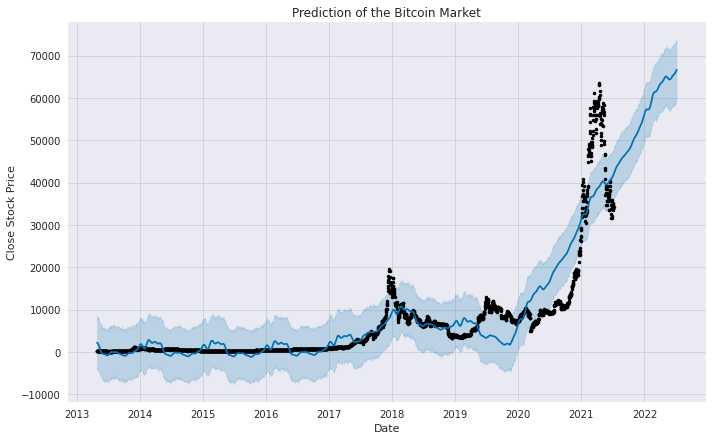

In [66]:
#fbprophet model

future = model11.make_future_dataframe(periods=365) 
prediction = model11.predict(future)
model11.plot(prediction)
plt.title("Prediction of the Bitcoin Market")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

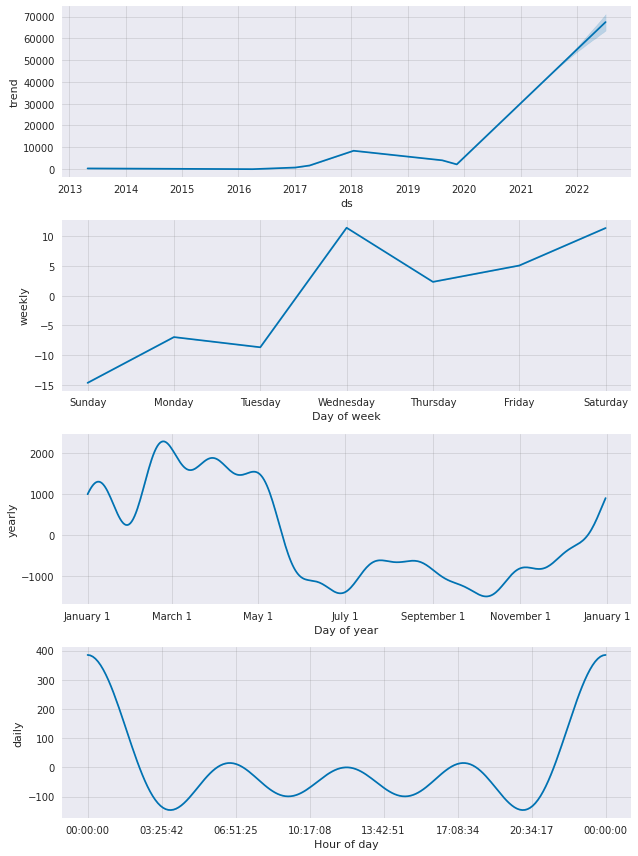

In [53]:
model11.plot_components(prediction)
plt.show()

In [54]:
##Long Short Term Memory Model

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

new_data = crypt_df['Name'].isin(['Bitcoin'])
new_data = crypt_df[new_data]

model_data = pd.DataFrame(columns = ['Date','Close'])
model_data['Date'] = new_data['Date']
model_data['Close'] = new_data['Close']

#setting index
model_data.index = new_data.Date
model_data.drop('Date',axis=1,inplace=True)

dataset = model_data.values
length = round(len(model_data)*0.5)

train = dataset[0:length,:]
valid = dataset[length:,:]

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

#x_train = scaled_data[860:,0]
#y_train = scaled_data[0:860,0]
#x_train
#x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


print(len(x_train),len(y_train),len(scaled_data))
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = model_data[len(model_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms


1436 1436 2991
1436/1436 - 38s - loss: 7.1710e-06 - 38s/epoch - 26ms/step


1875.398202542654

In [56]:
len(y_train)

1436

In [57]:
model_data = pd.DataFrame(columns = ['Datetime','Close'])
model_data['Datetime'] = new_data['Date']
model_data['Close'] = new_data['Close']
model_data['Time'] = pd.to_datetime(model_data['Datetime']).dt.time
model_data['Date'] = pd.to_datetime(model_data['Datetime']).dt.date
b = (model_data['Date']-model_data['Date'].min()).astype('timedelta64[D]').astype(int)+1
model_data['DateInt']= b

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



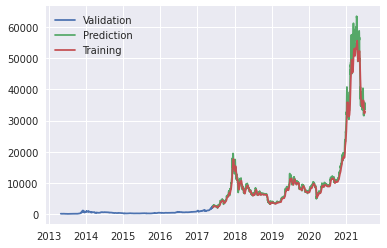

In [58]:
#for plotting
train = model_data[:length]
valid = model_data[length:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend({'Training','Validation','Prediction'})

In [59]:
from sklearn.ensemble import RandomForestRegressor

X = pd.DataFrame(model_data.DateInt)
y = pd.DataFrame(model_data.Close)

X_train = X
y_train = y

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
pred = pd.DataFrame(np.linspace(len(X),len(X)+365,366))

Predictions = rf.predict(pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [61]:
Predictions

array([34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756076,
       34216.6756076, 34216.6756076, 34216.6756076, 34216.6756

### Problem 4: Presentation in the class (10 mins and 10 points)

* (5 points) Present your slides in the class. 
* (5 points) Participate in peer review process. 

Suggestion: You should practice so that your presentation does not exceed 10 minutes. All members of a group should share equal responsibility to present. 



# Report: communicate the results (20 points (or 25 points))

** minimum 8 pages **

(1) (5 points) What is your business proposition?

(2) (3 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data? What conjectures you made? Which conjecture you used as the basis of developing your model? Why?

(4) (3 points) How does your analysis support your business proposition?
(please include figures or tables in the report, but no source code)

(5) (4 points) How does the model tie in with the business proposition?

(5) (bonus 5 points) How did your team work together as a group from ideation to implementaion? Write in one page.

# Slides (for 10 minutes of presentation) (10 points)


1. (2 points) Motivation about the data collection, why the topic is interesting to you. 


2. (3 points) Conjectures you made. Reasons behind choosing a particular conjecture for the basis of developing a model.


2. (3 points) Communicating Results (figure/table)


4. (2 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_4_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2d6e19ab-9412-43ea-82d3-22ff06f4d7ac' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>